<a href="https://colab.research.google.com/github/alecq26/Data-science-/blob/main/Alec_Quere_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

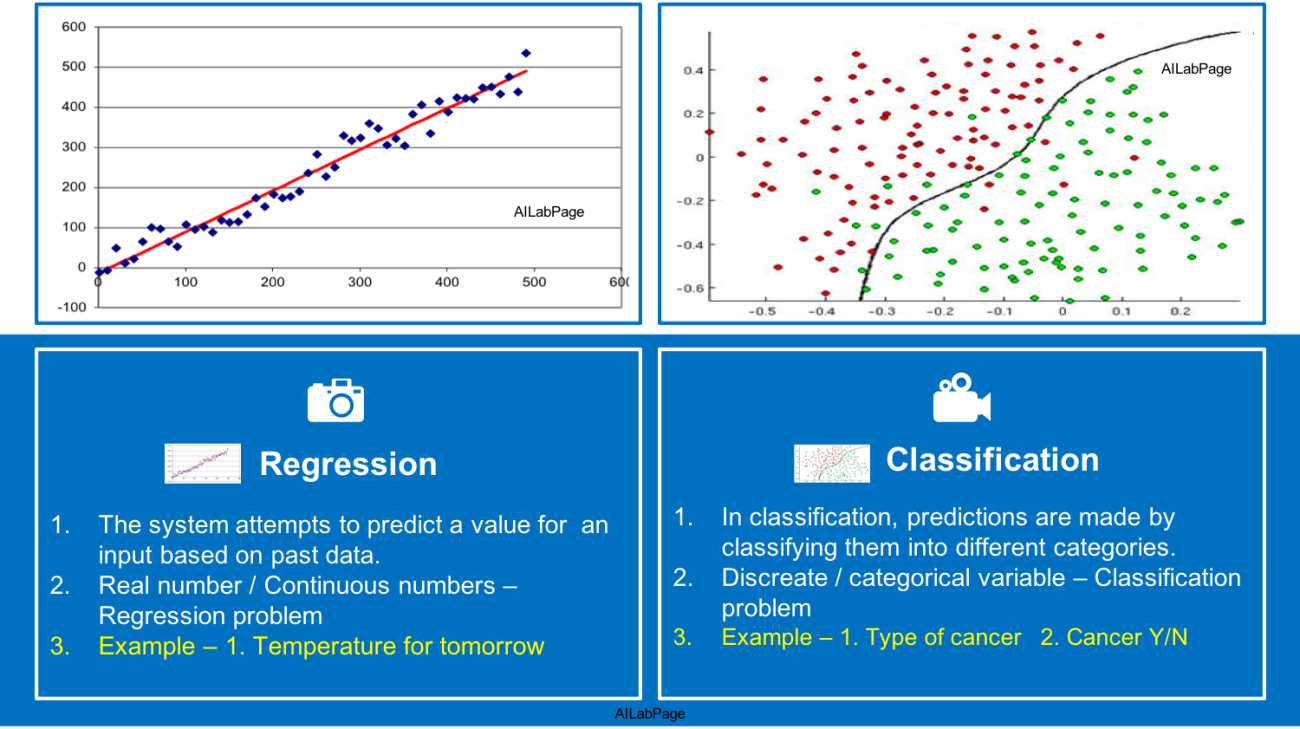

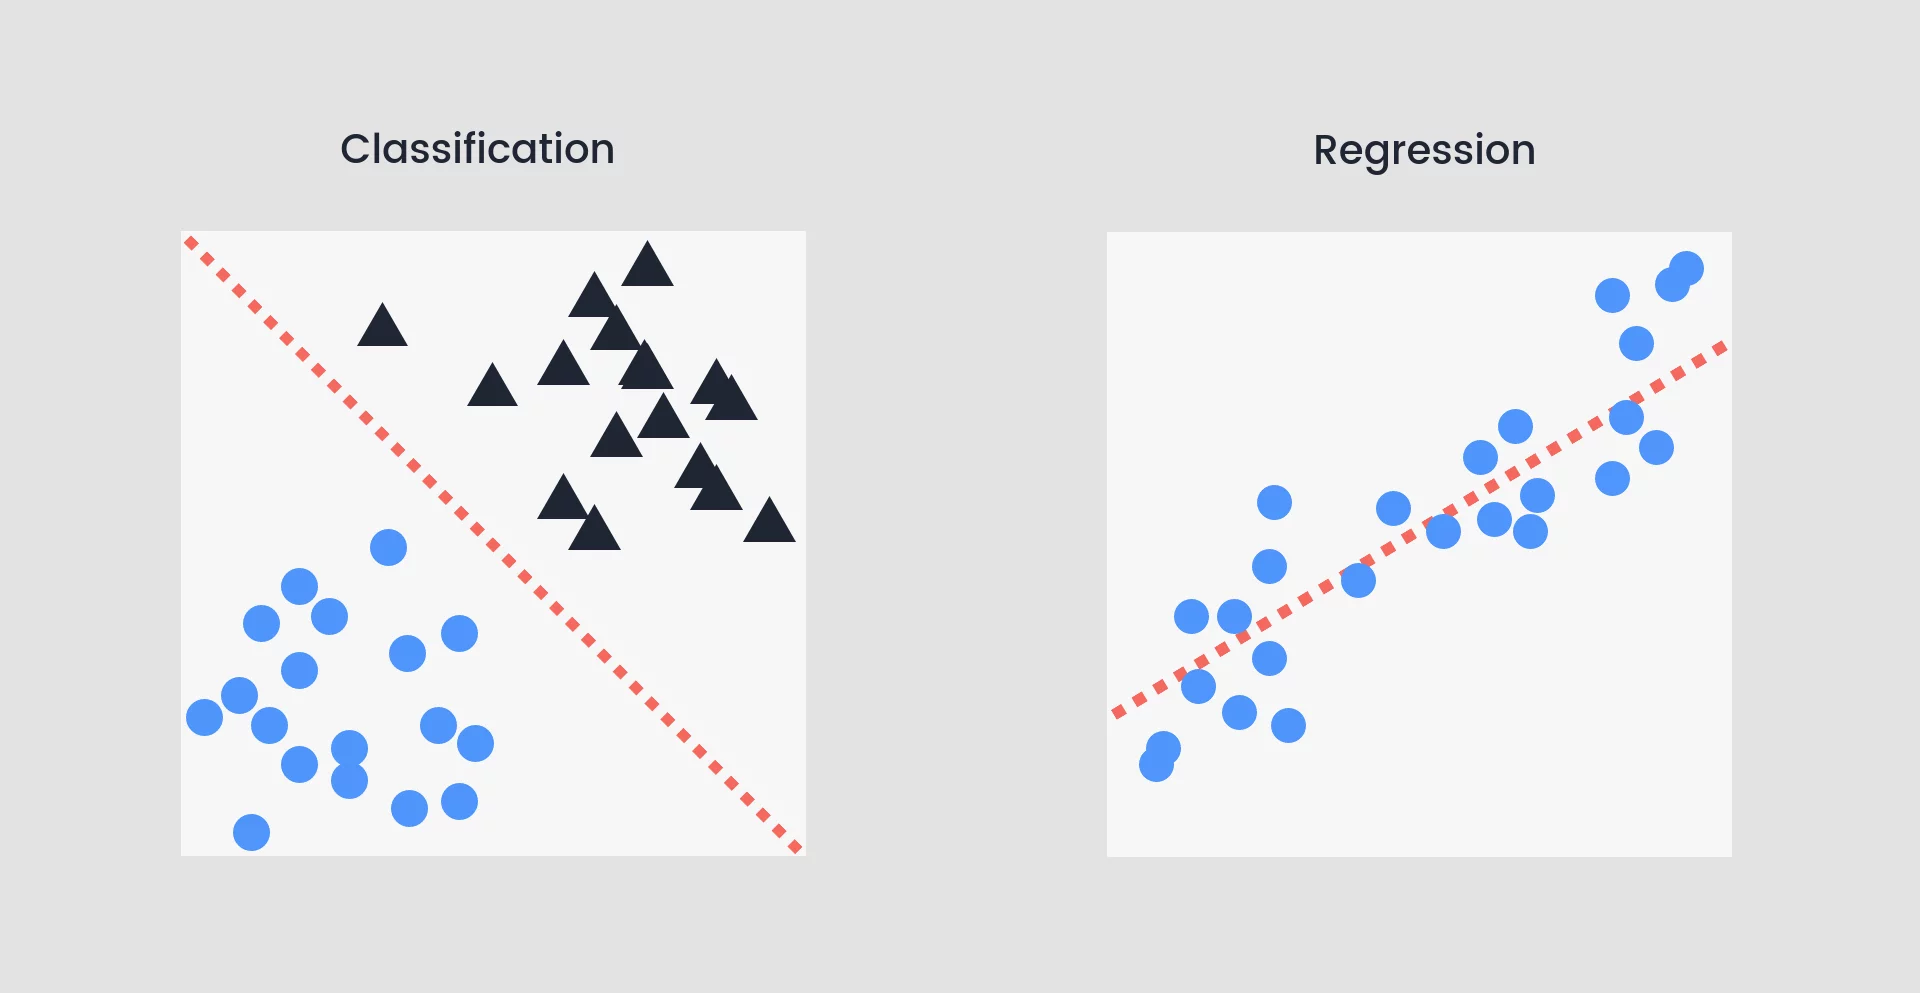

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

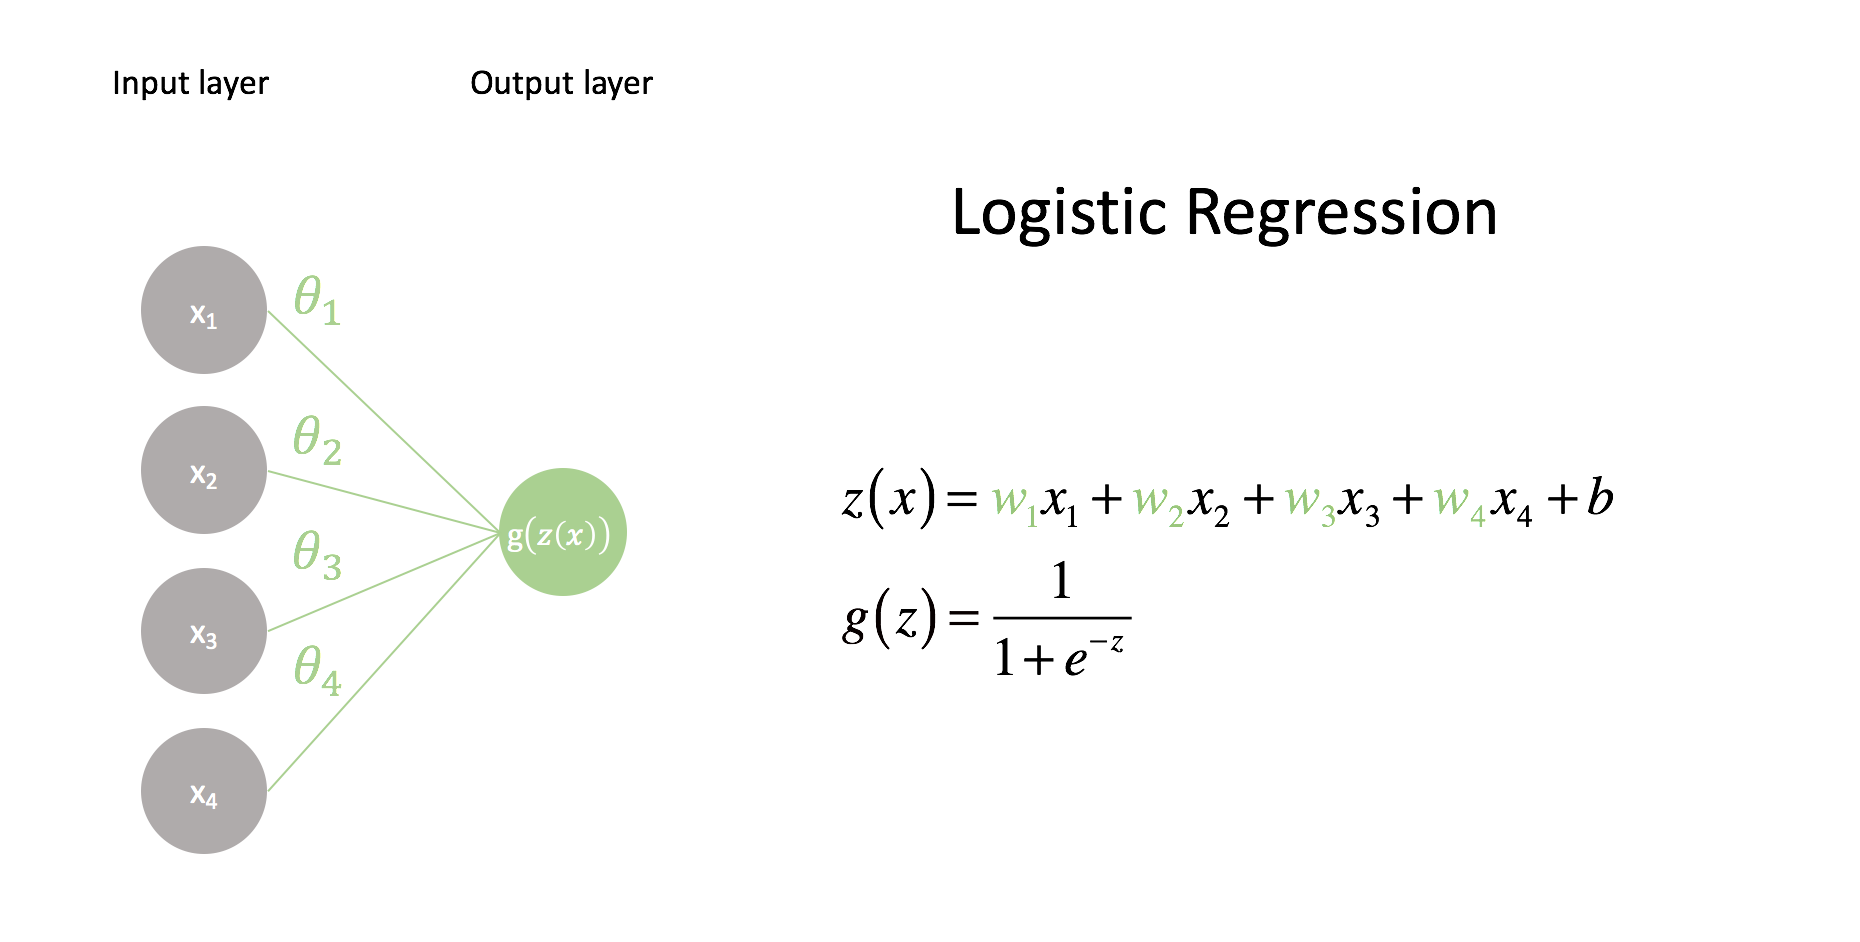

Thes images are formulas to find layers of data from a logistic regression

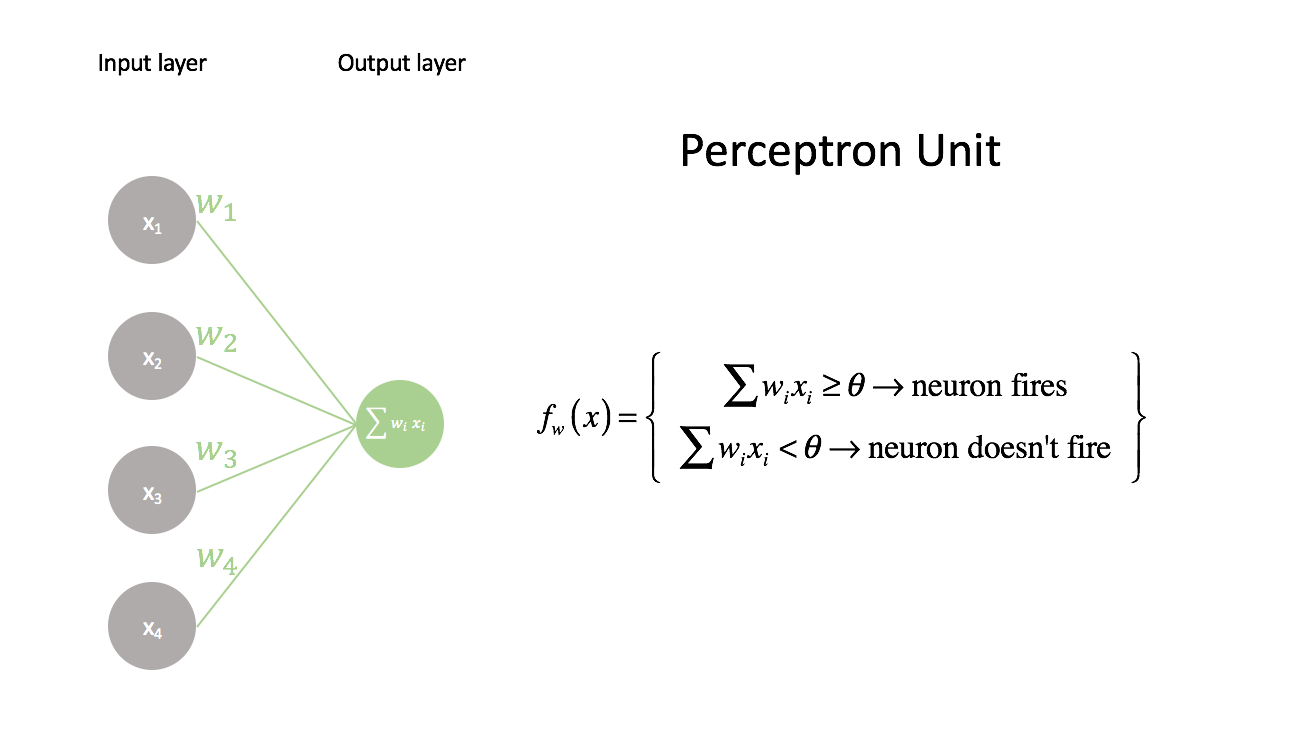

This is the formula to find perceptron units

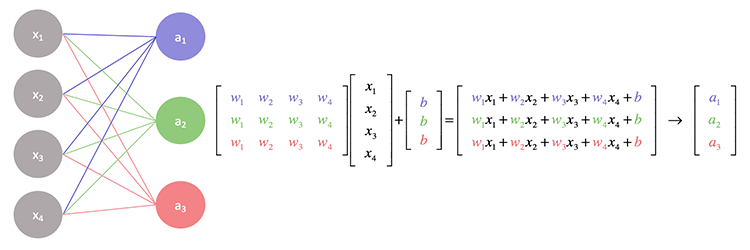

This is a network of data points

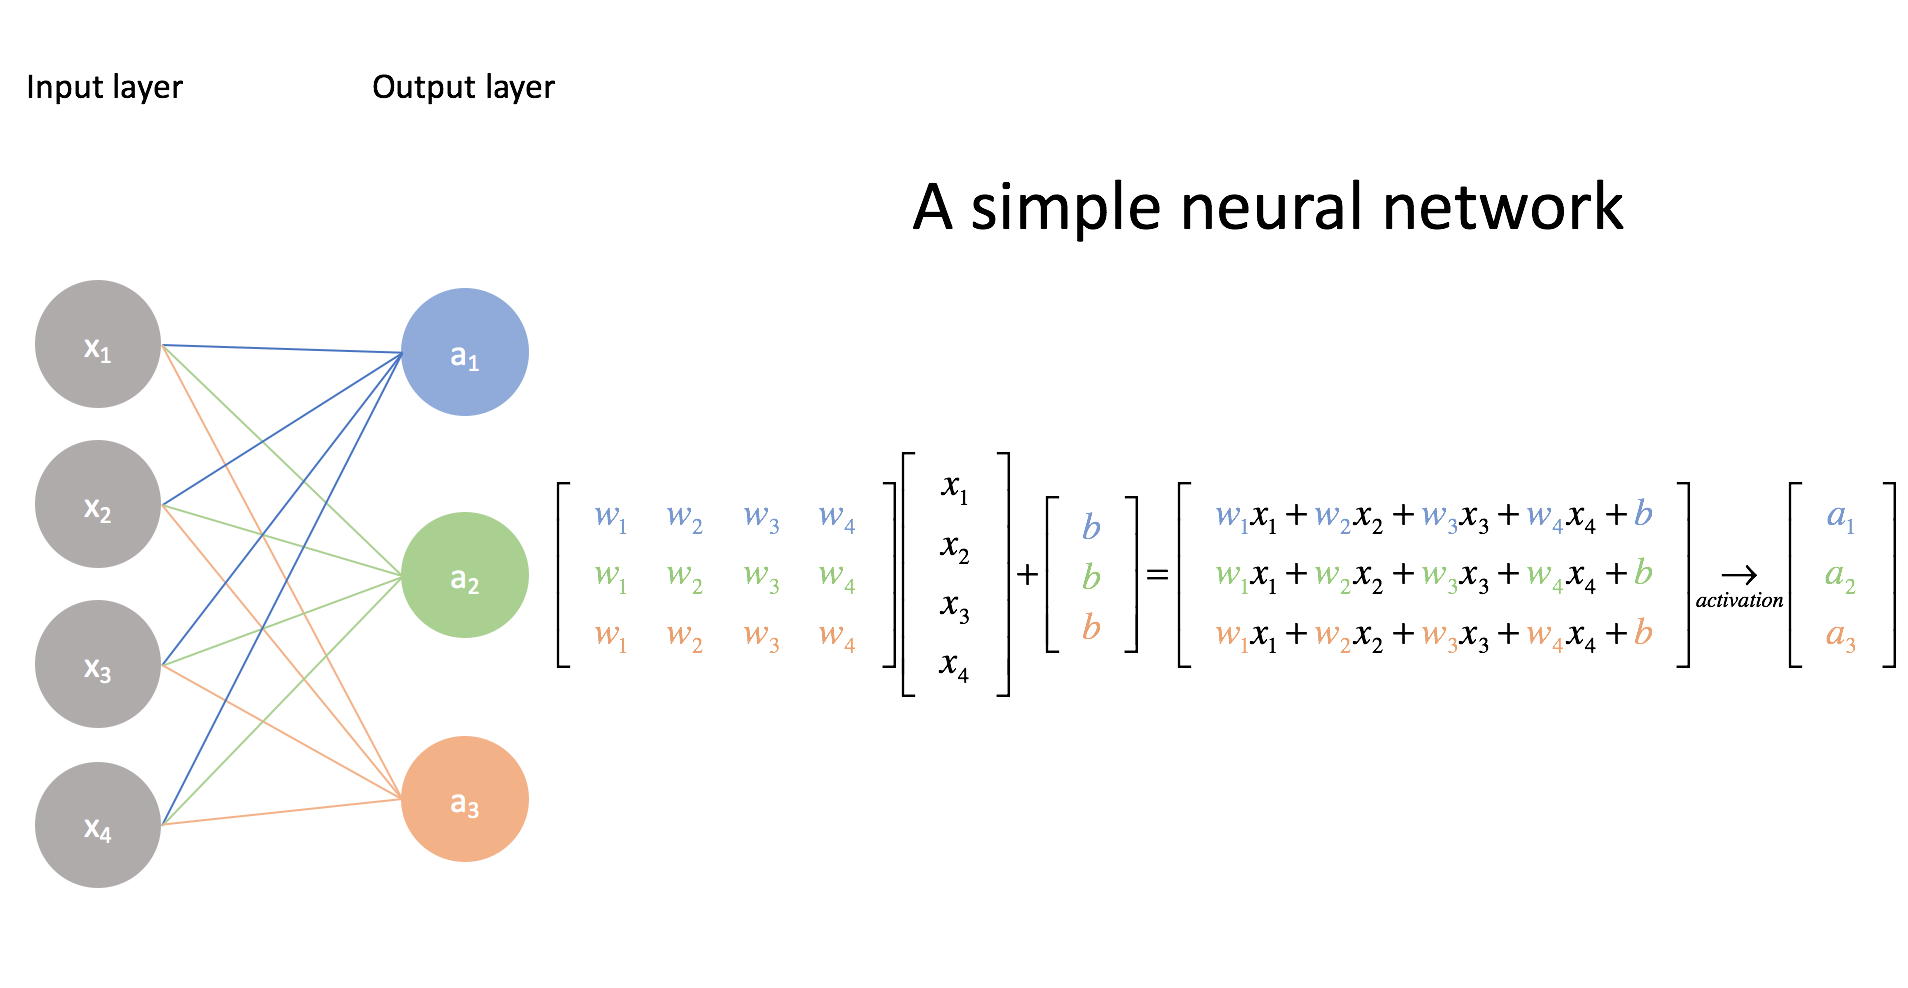

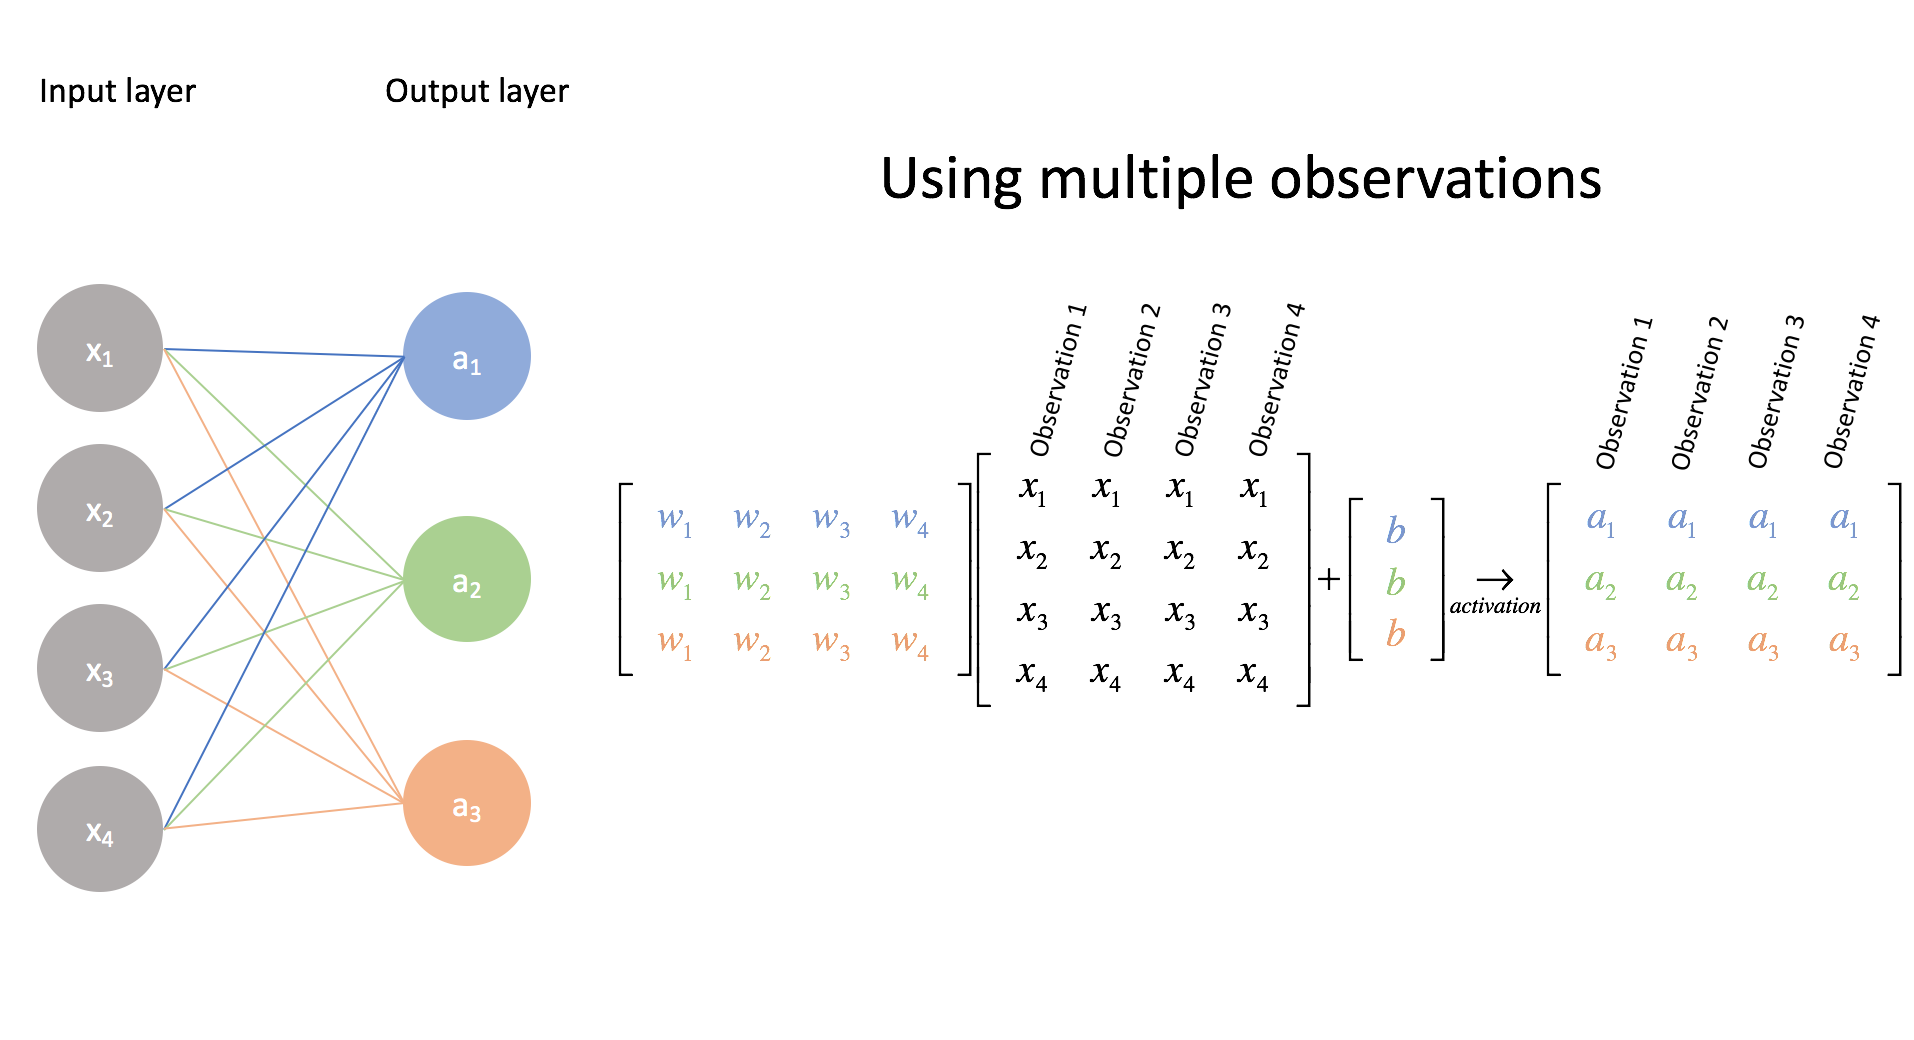

This shows the different types of data points 

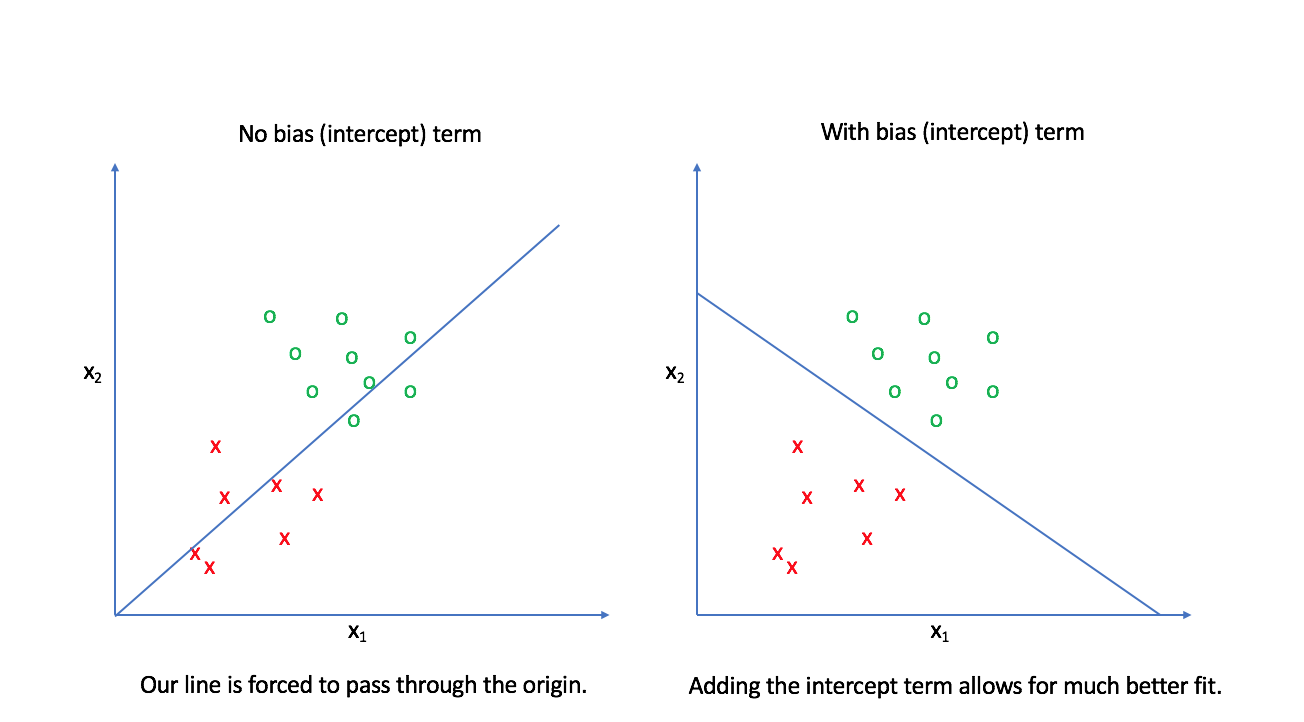

This shows data with bias compared to data without

In [110]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-juluwxjl
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-juluwxjl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This is adding shortcuts to different websites to run different data sets 

# $y=mx+b$

In [111]:
x = np.arange(0,9)

This is setting a range 0 to 9

In [112]:
x.shape

(9,)

this is shaping x 9 to a number for whatever info were going to put in

In [113]:
x = x[:,None]

In [114]:
x.shape

(9, 1)

now x is shaped 9 to 1

In [115]:
y = 3*x-5

This means y = the numbers of x times 3 -5 

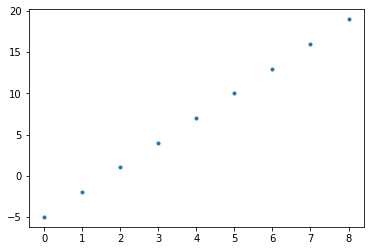

In [116]:
plt.plot(x,y,'.')

this is the plot of x and y 

##Solve Linear Fit Using Pytorch Gradient Descent

In [117]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [118]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [119]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

In [121]:
loss.item()

0.003640171606093645

This calculates loss

In [122]:
m.item()

2.993407964706421

calculates m

In [123]:
b.item()

-4.963114261627197

calculates b

# Pytorch Linear Model

In [124]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [125]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [126]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [127]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


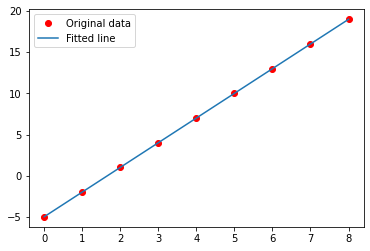

In [129]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [130]:
model

Linear(in_features=1, out_features=1, bias=True)

This is setting up the data 

In [131]:
model.weight

Parameter containing:
tensor([[2.9967]], requires_grad=True)

How much the model is going to require to run

In [132]:
model.bias

Parameter containing:
tensor([-4.9815], requires_grad=True)

Factoring in the bias of the model

In [133]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [134]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [135]:
def plotfc(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [136]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [137]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [138]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [139]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [140]:
X.shape

(60000, 1, 28, 28)

This shapes the data so we get the picture we want

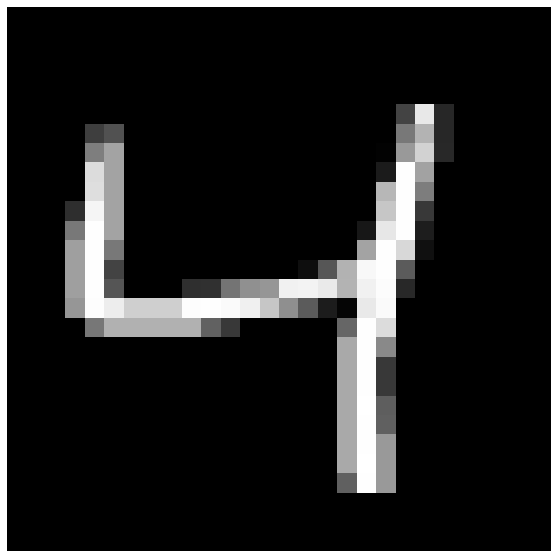

In [141]:
plot(X[2,0,:,:])

This is what the computer prints out after we put in all the data

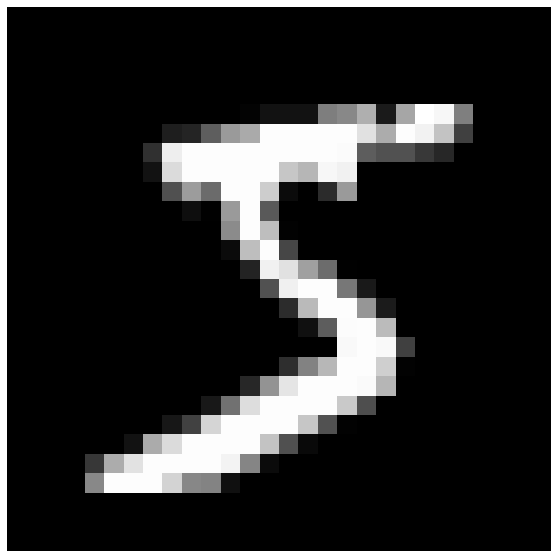

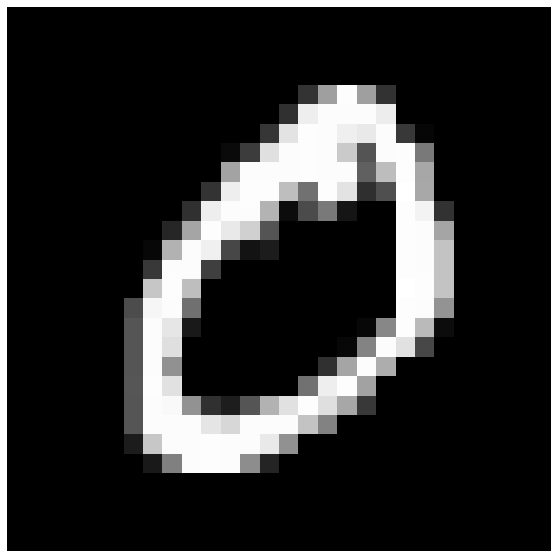

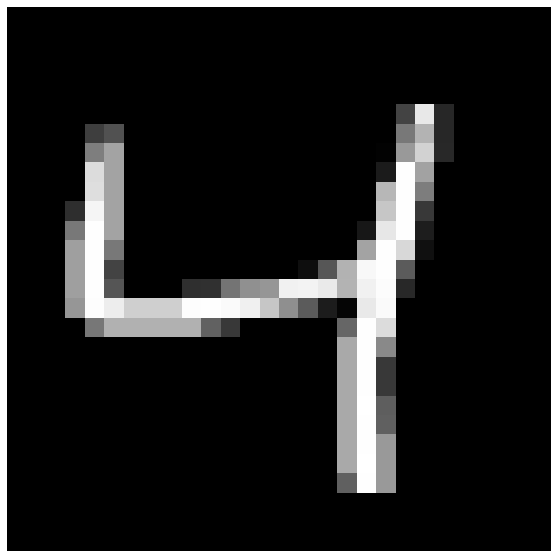

In [142]:
for i in range(3):
    plot(X[i,0,:,:])

We changed the data a little and told it to print out 3 images and this is what it printed out

In [143]:
Y

array([5, 0, 4, ..., 5, 6, 8])

This array sets us up to print out more clear images 

In [144]:
X[0:25,0,:,:].shape

(25, 28, 28)

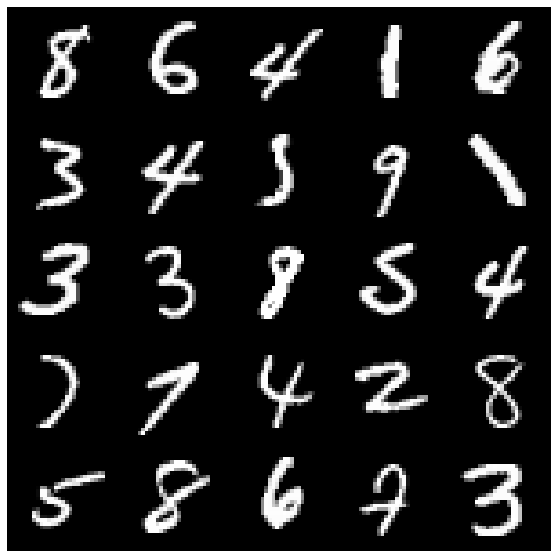

In [145]:
montage_plot(X[125:150,0,:,:])

This is the array we get from y

In [146]:
X_test.shape

(10000, 1, 28, 28)

This alows us to test numbers between 1 and a 1000

In [147]:
X.shape[0]

60000

In [148]:
X_test.shape[0]

10000

In [149]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [150]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

This sets up the shape to make x

In [151]:
28*28

784

Hust basic math

In [152]:
x[0]

tensor([0.])

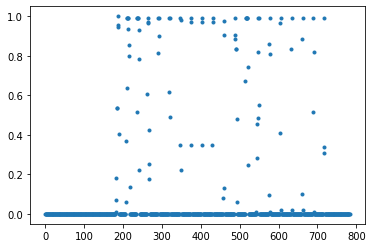

In [153]:
plt.plot(X[100],'.')

This plots all the data weve been entering 

In [154]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <a list of 10 Patch objects>)

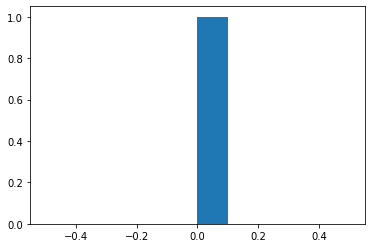

In [155]:
plt.hist(x[0])

This is a bar graph of the data we've been entering 

In [156]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W (1).data'

This is pulling the data from the link and putting it in colab

In [157]:
W = torch.load("W.data")

In [158]:
W.shape

torch.Size([784, 10])

This is shaping the data 

In [159]:
X.shape

torch.Size([60000, 784])

In [160]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

This is formating all of the data to makw it into and imgage

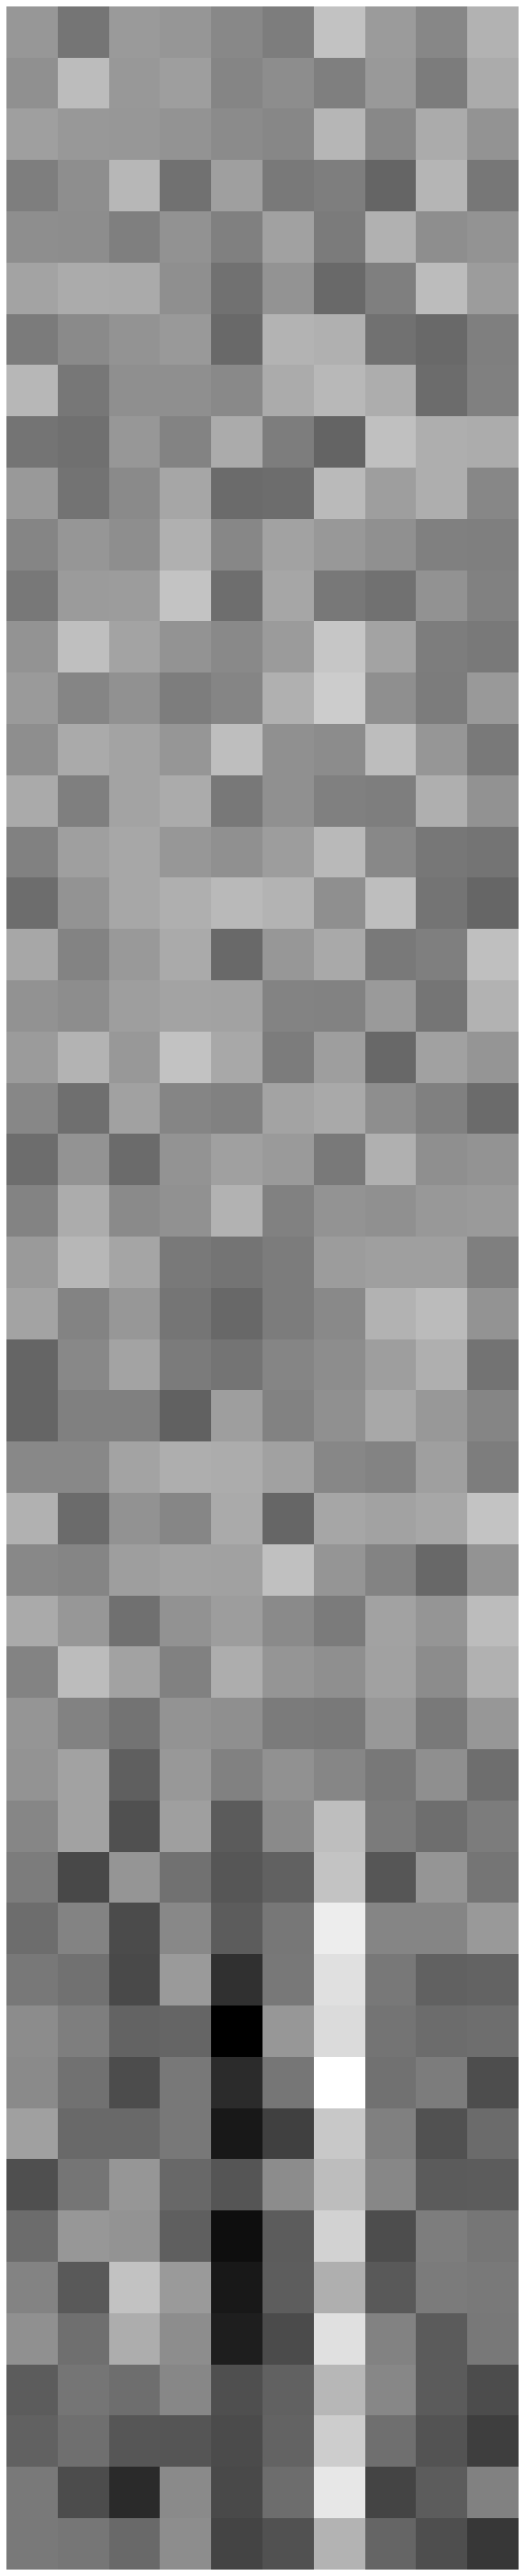

In [161]:
plot(W[0:50,:10])

This is the image the data shoot out 

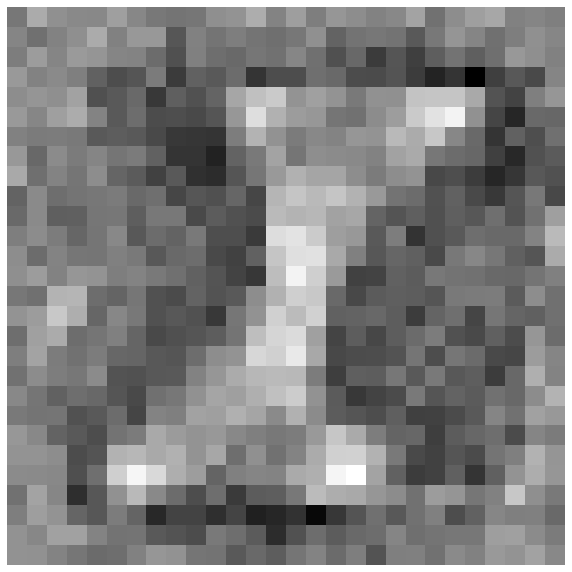

In [162]:
plot(W[:,1].reshape(28,28))

This is just reshaping it with different numbers

In [1]:
X.shape

NameError: ignored

This os giving us the shape of the image 

In [164]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [165]:
x,y = get_batch('train')

In [166]:
x.shape

torch.Size([1000, 784])

This gives us the size and shape of the image 

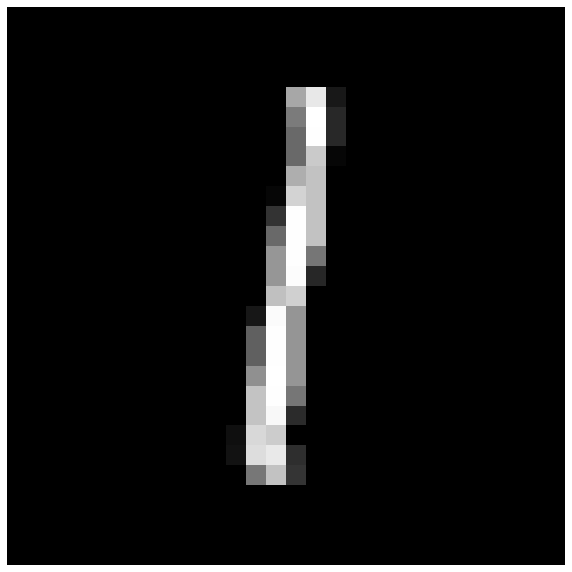

In [167]:
plot(x[0].reshape(28,28))

And this is what the data prints out

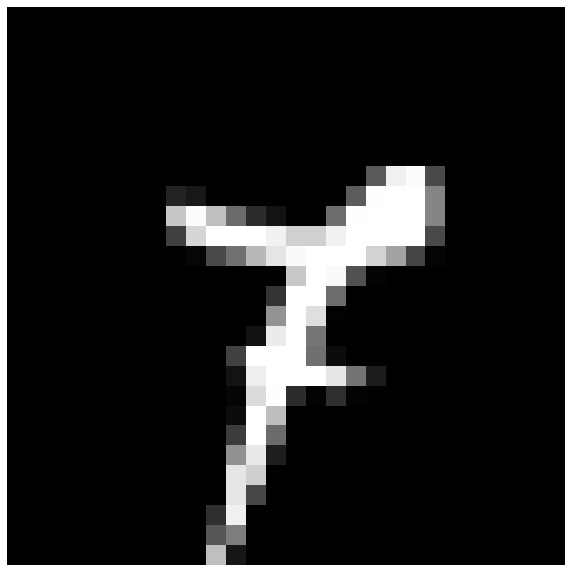

In [168]:
plot(x[1].reshape(28,28))

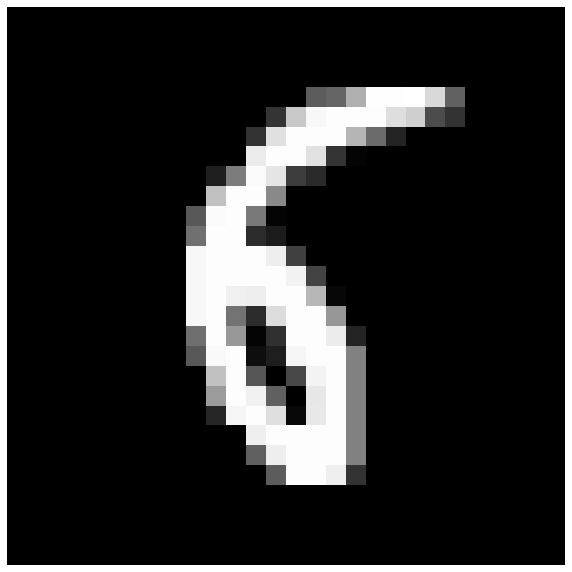

In [169]:
plot(x[2].reshape(28,28))

In [ ]:
y

These are all the possible values for y

In [171]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

These are the sizes of x and y in the image 

In [172]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [173]:
(x@W).shape

torch.Size([1000, 10])

In [174]:
%%timeit
x@W

21.9 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [175]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

These are the values that are going to make up the image 

https://eleif.net/clicktimer.html

In [176]:
x@W

tensor([[ -3.0864,   7.0690,   0.8317,  ...,  -2.3593,   2.1635,  -1.0836],
        [ -5.6253,   0.6158,  -3.9783,  ...,   3.5271,   5.9564,   3.7043],
        [ -0.5154,  -1.8393,  -1.5773,  ..., -12.2537,   5.6476,  -0.7003],
        ...,
        [  4.5083, -17.1408,   2.5040,  ..., -14.3157,  -8.2410,  -8.0015],
        [ -3.3886,  -4.9382,  -8.1212,  ...,  -1.5009,   0.9677,   3.7482],
        [ -5.3896, -14.0055,   1.1100,  ...,  15.6590,   0.5365,   2.6838]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [177]:
y2 = x@W 

this sets y2 = to that data set

In [178]:
y2.shape

torch.Size([1000, 10])

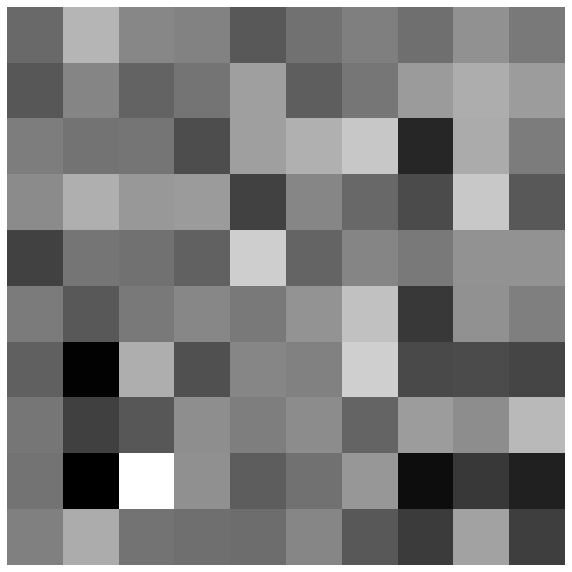

In [179]:
plot(y2[0:10,:])

In [ ]:
y

In [181]:
one_hot(y)

<ipython-input-133-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]], device='cuda:0')

These are the values y equals

<ipython-input-133-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


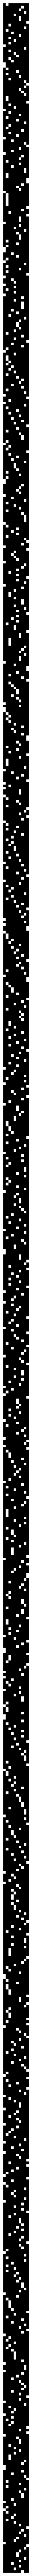

In [182]:
plot(one_hot(y))

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

This is the image printed out from the y values

In [ ]:
y

In [ ]:
torch.argmax(y2,1)

This sets the data to y2 and 1

In [186]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.9130, device='cuda:0')

this put the tensor less than 1 for the data set 

In [187]:
X.shape

torch.Size([60000, 784])

This is the size the x value will be in the image

In [188]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

These are the values of the images

In [189]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

This changes the tensor to the values we want it as

In [190]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

The y prints out the values of the tensor

In [191]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [192]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

These are the values are image should come out as

In [193]:
W.shape

torch.Size([784, 10])

This is the shape we want the image as 

In [194]:
W[:,0].shape

torch.Size([784])

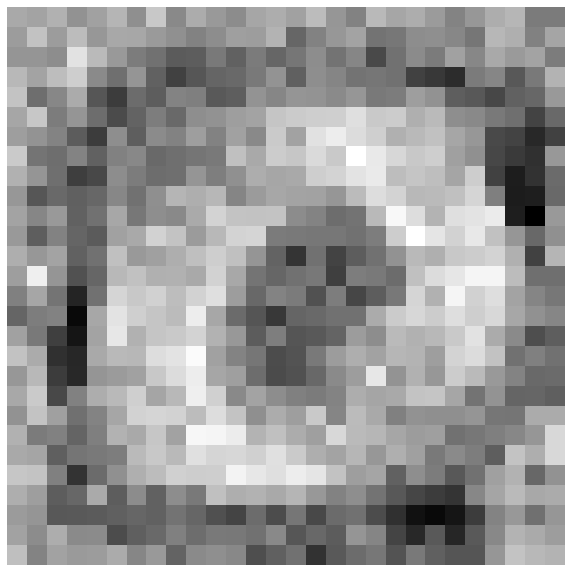

In [195]:
plot(W[:,0].reshape(28,28))

This is the image from all of our data 

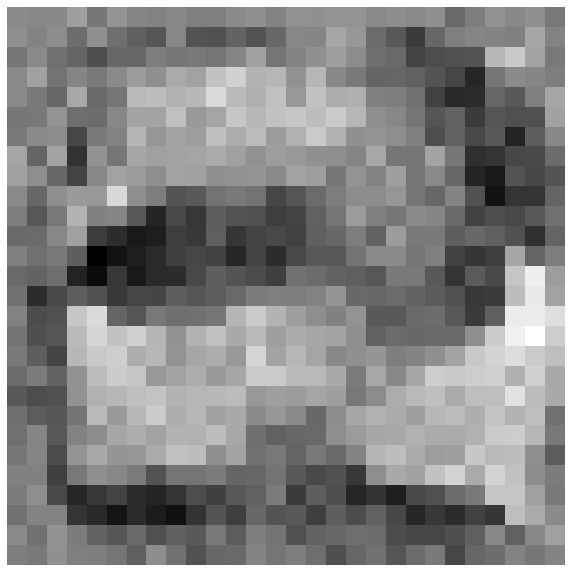

In [196]:
plot(W[:,2].reshape(28,28))

In [197]:
W.shape

torch.Size([784, 10])

In [198]:
(W.T).shape

torch.Size([10, 784])

This is changing the size and shape of our image and clearing it up a little

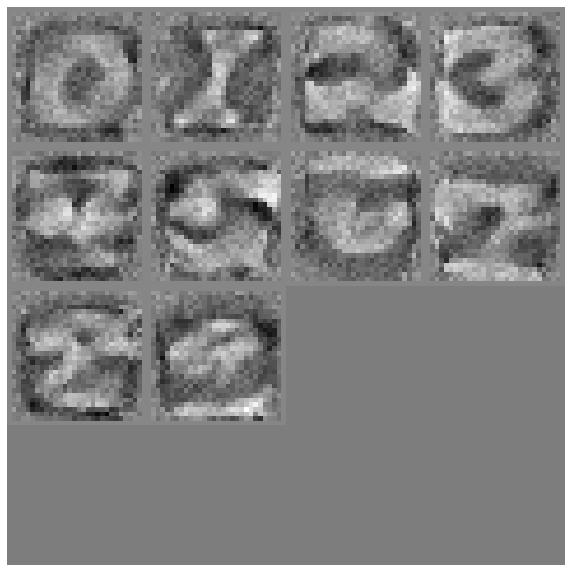

In [199]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

And this is the final product we get from the data

In [200]:
###################################################

In [201]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

This is the formula we are using to put our data into the image 

In [202]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [203]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

This takes are data and gives us the softwear we need to run it

In [204]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

This takes our outputs and labels and prepares them for the graph

In [205]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

These are the graphs the data from above prints out 

In [206]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [207]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

This gives us the return of z

In [208]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

This gives us the return of y shape and the max output 

In [209]:
X.shape

torch.Size([60000, 784])

This is ther shape we're getting 

In [210]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

This is a test ran on the data

In [211]:
def model(x,w):

    return x@w[0]

In [212]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

<ipython-input-133-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


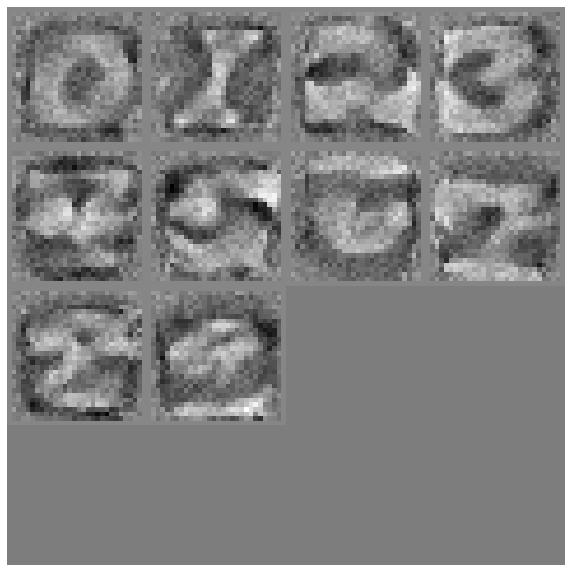

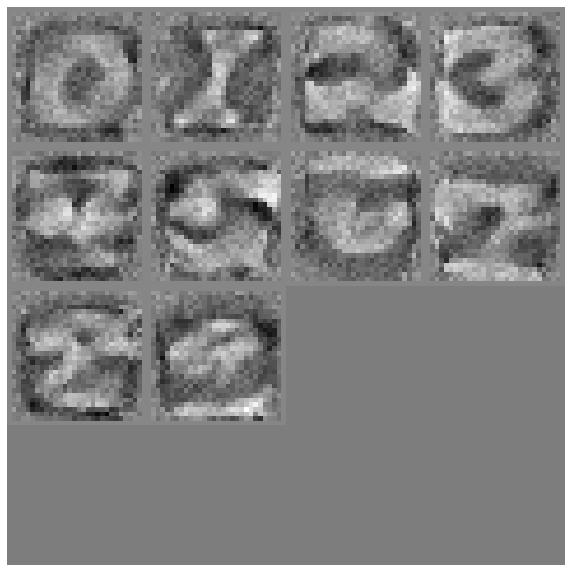

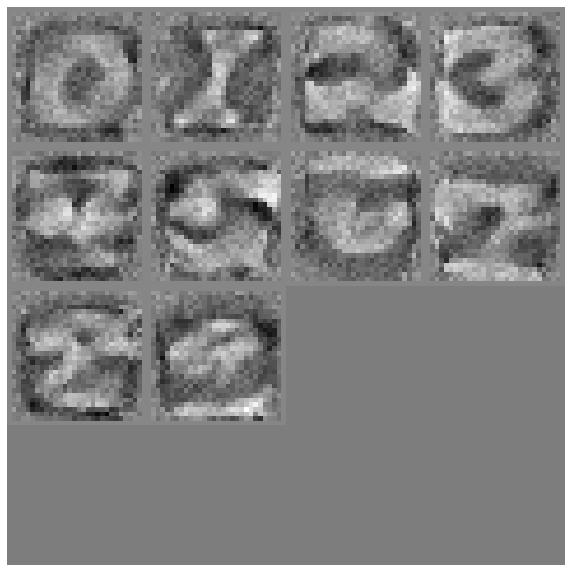

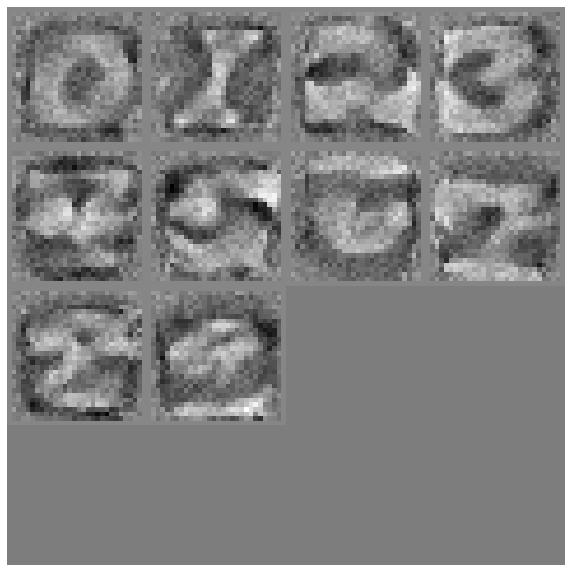

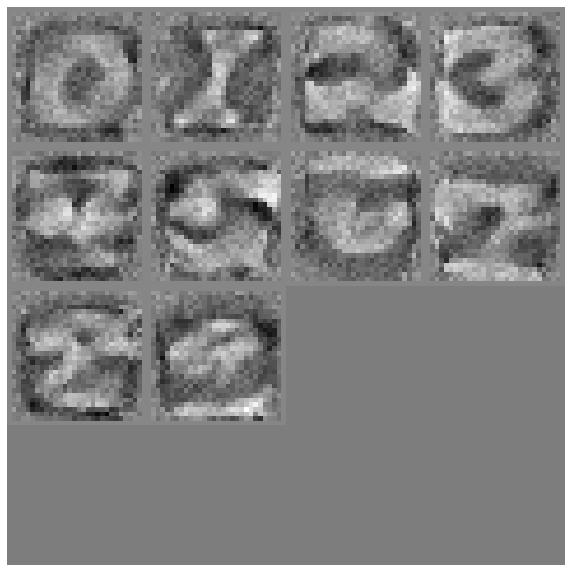

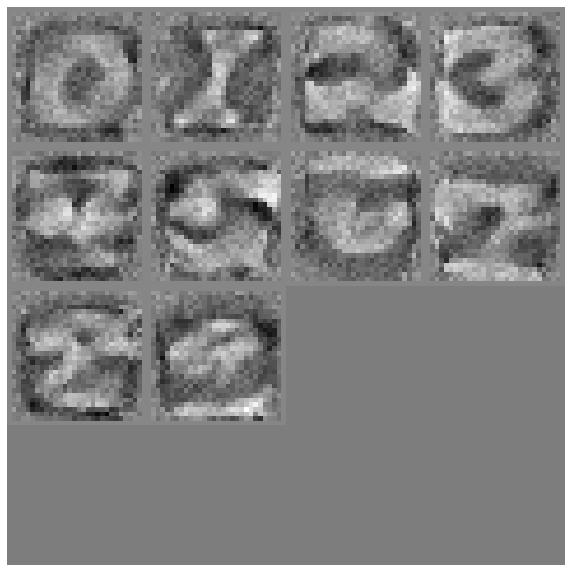

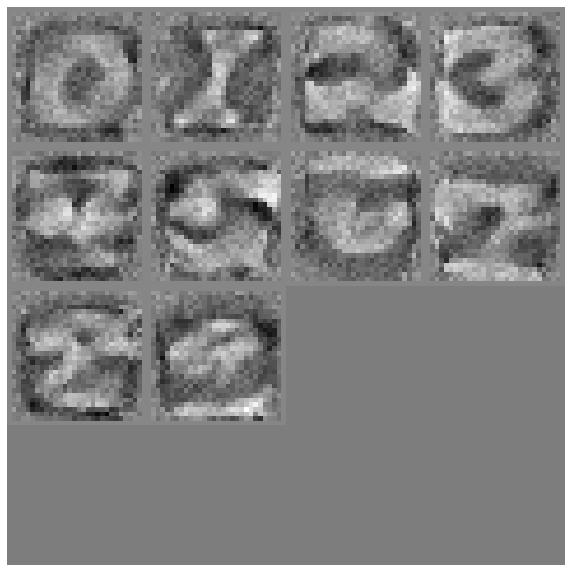

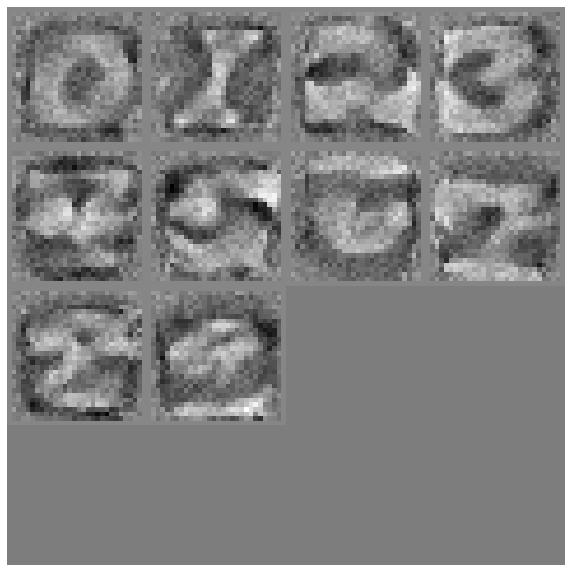

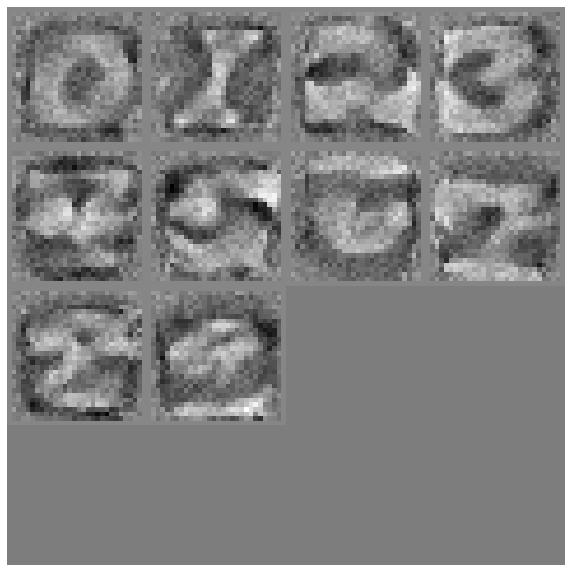

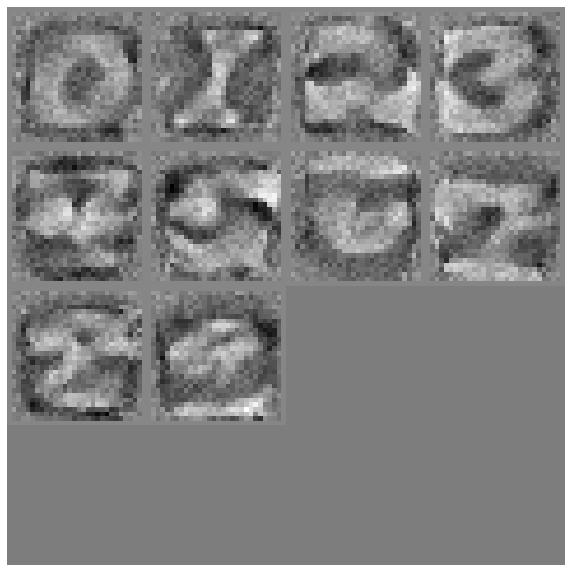

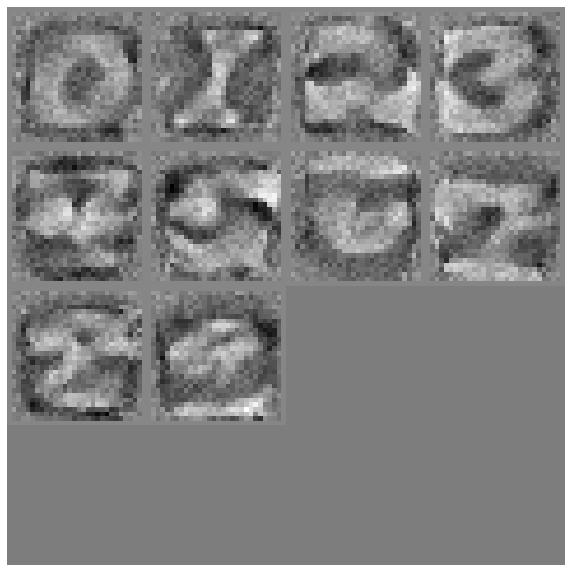

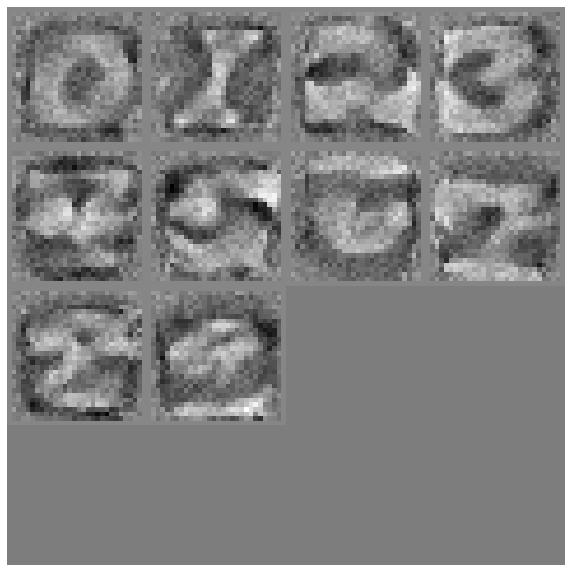

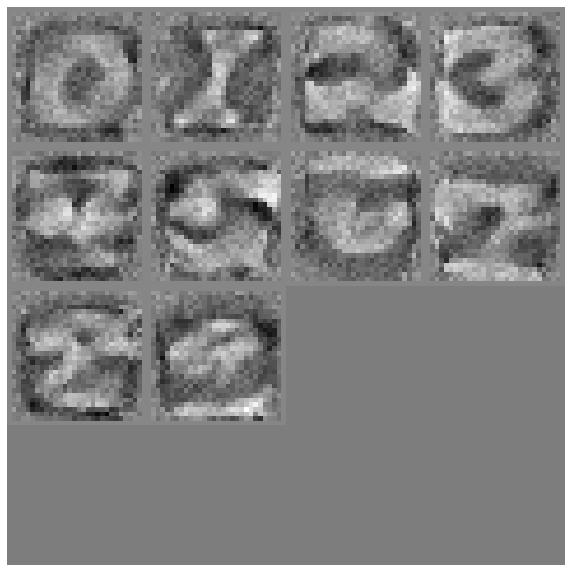

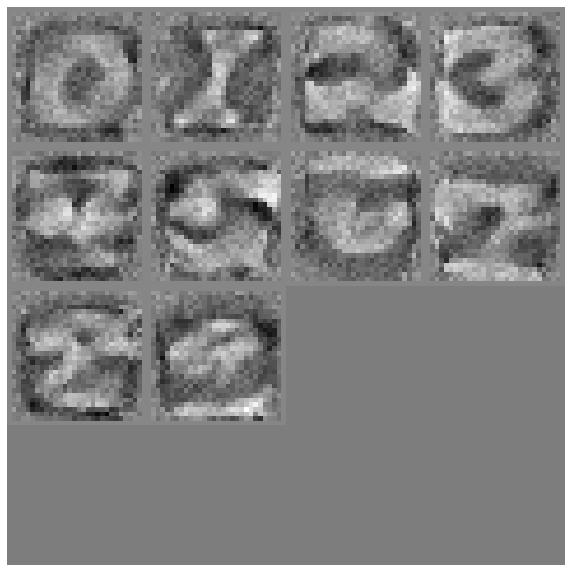

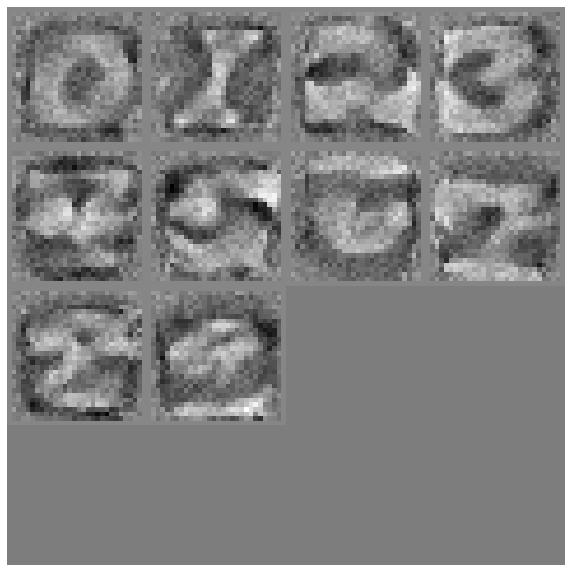

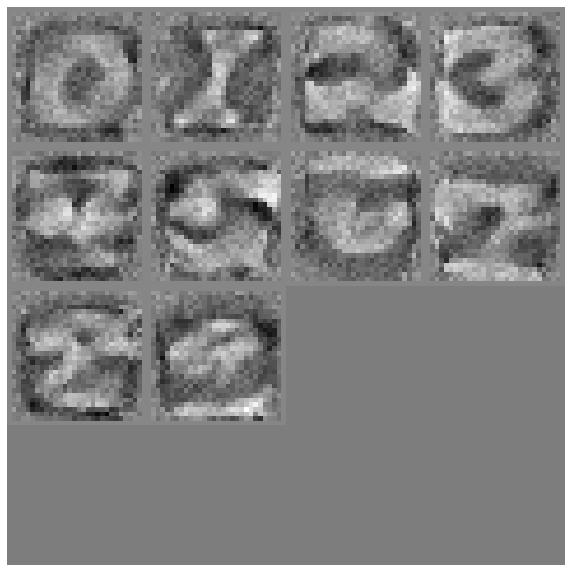

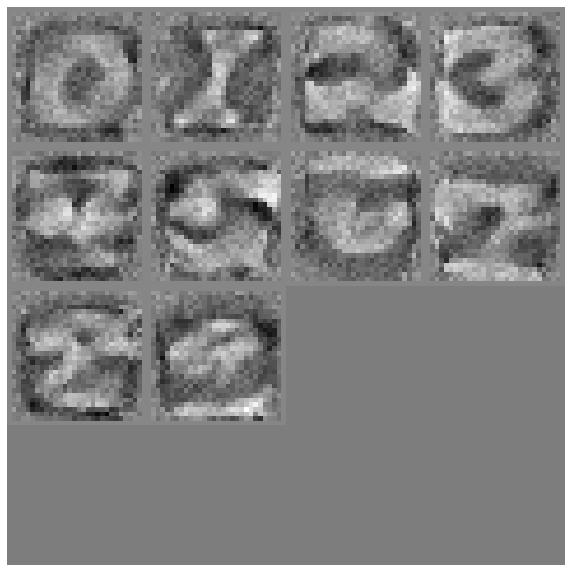

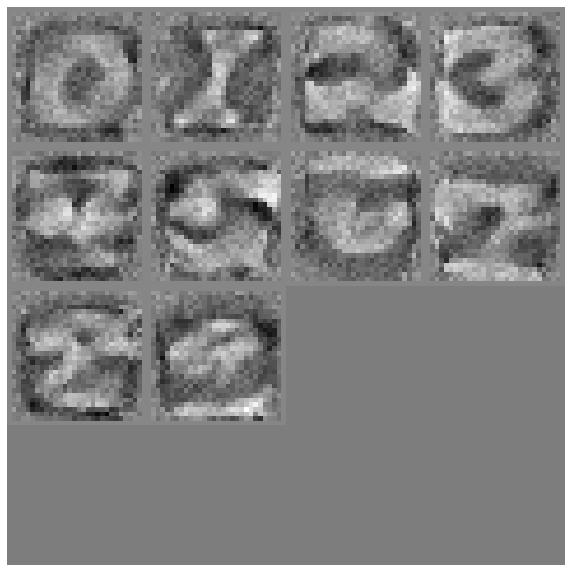

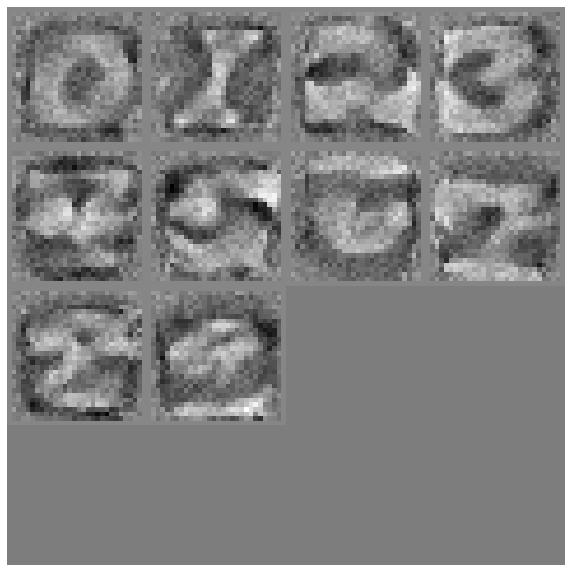

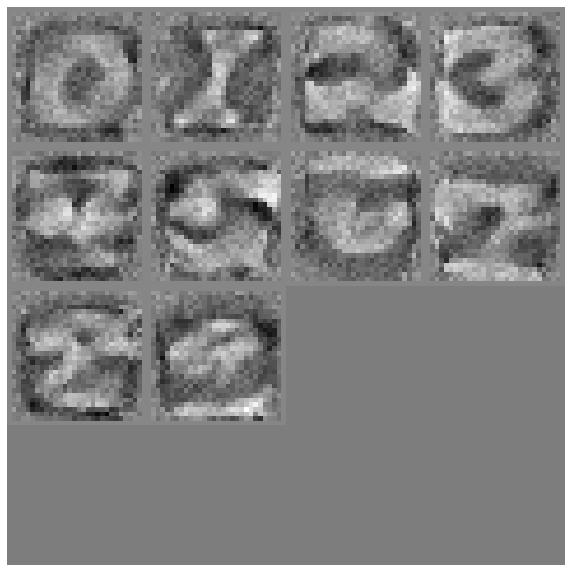

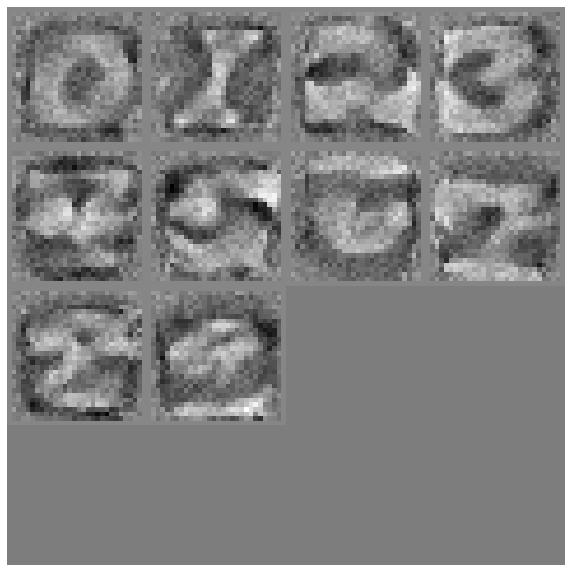

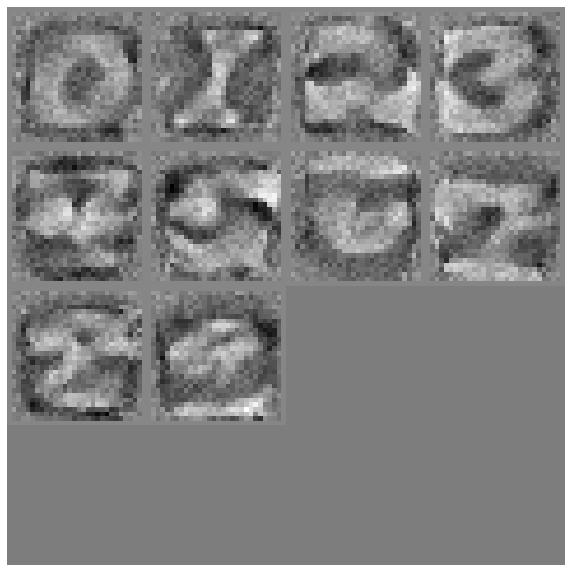

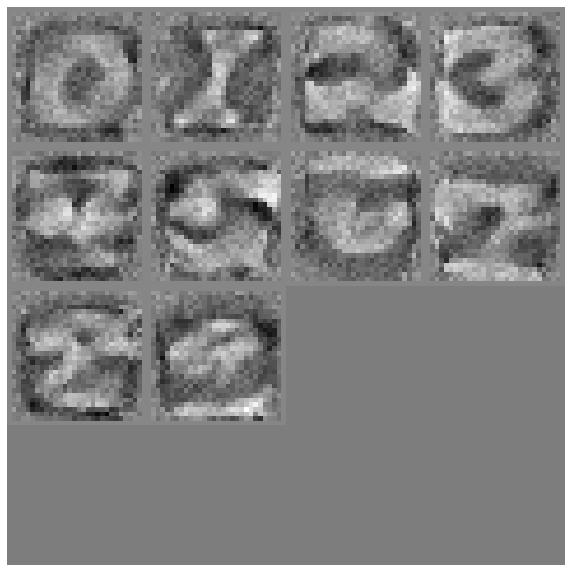

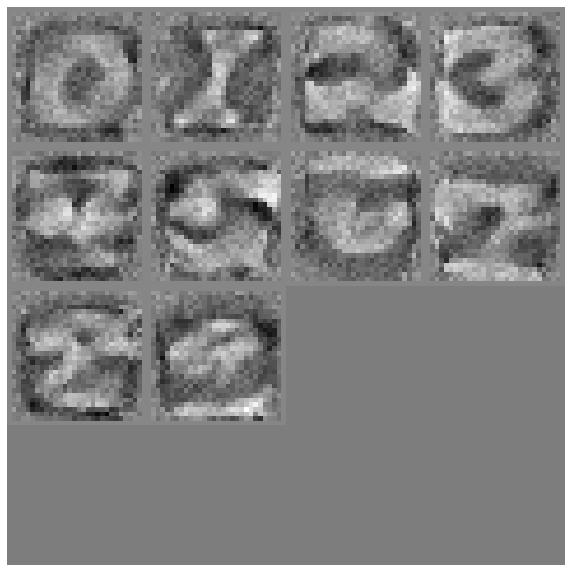

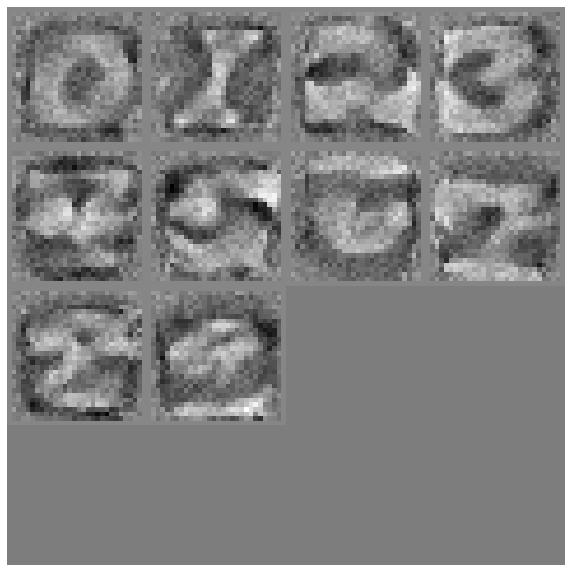

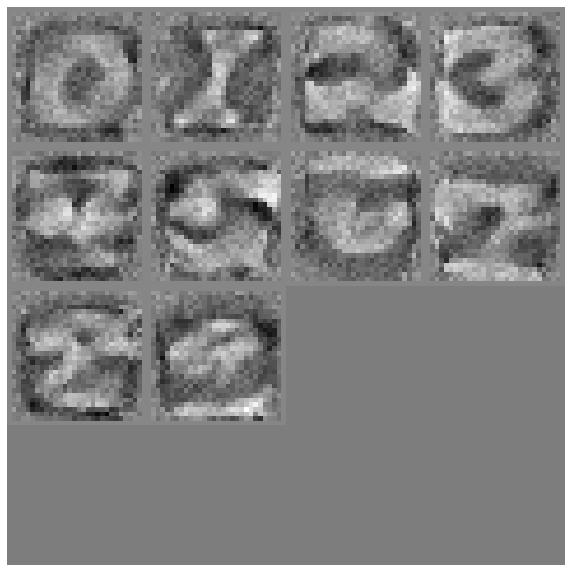

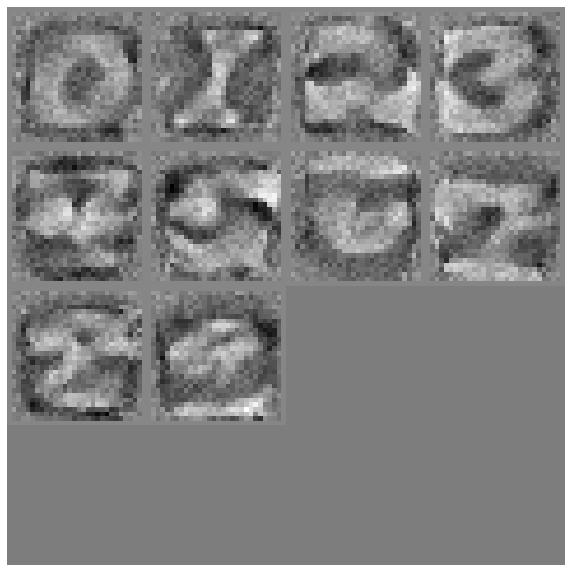

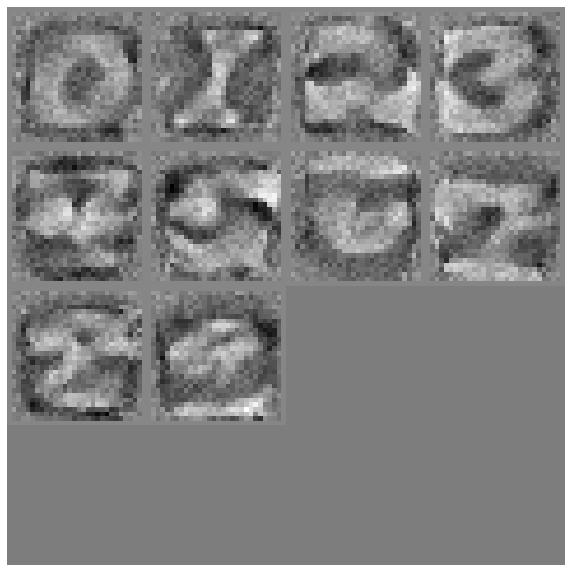

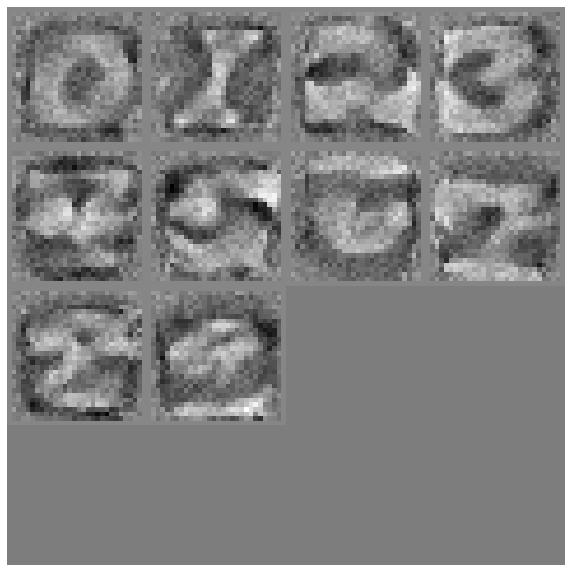

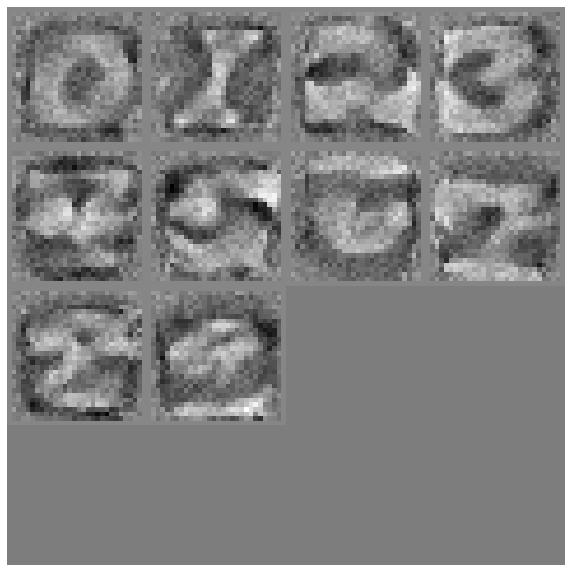

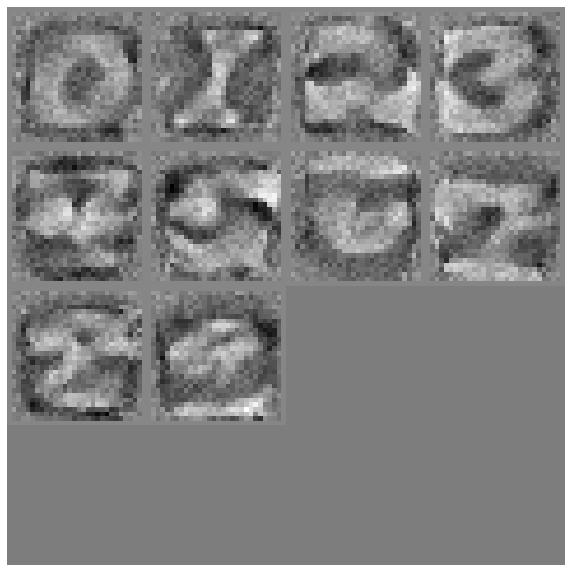

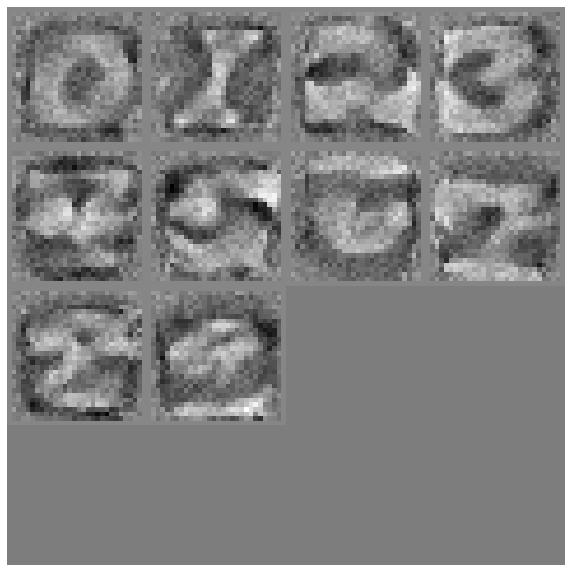

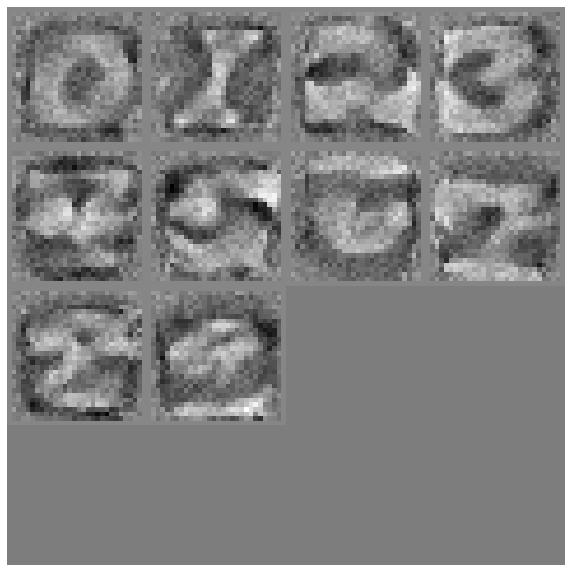

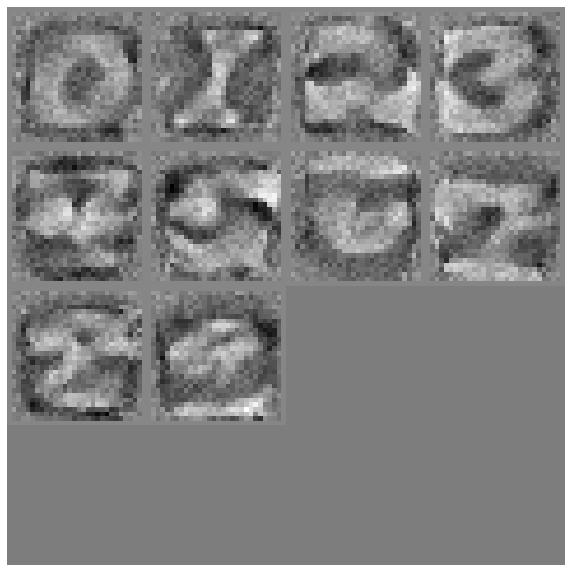

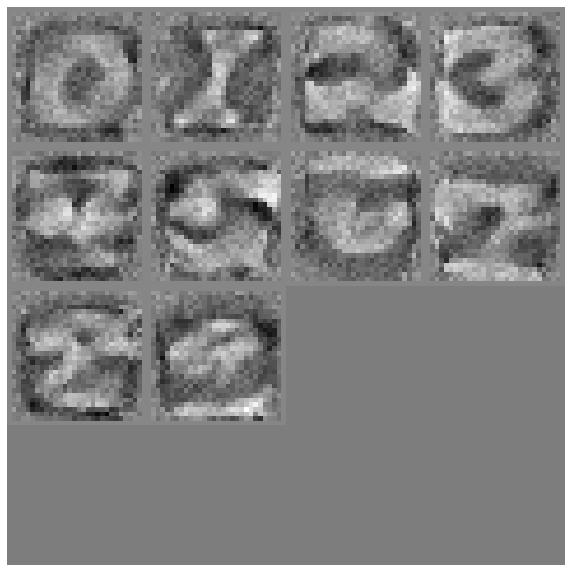

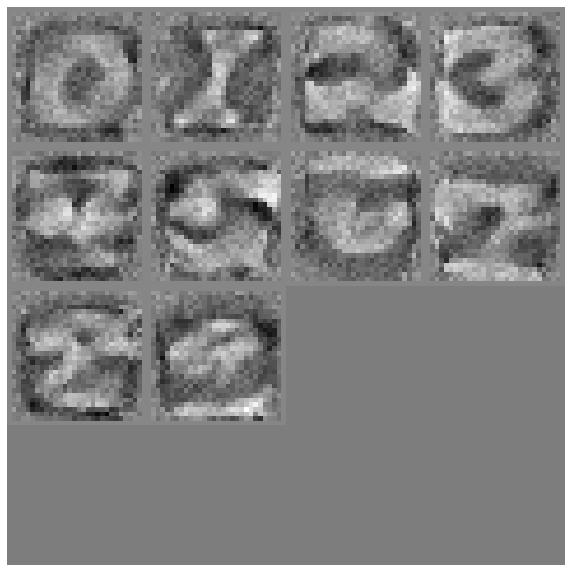

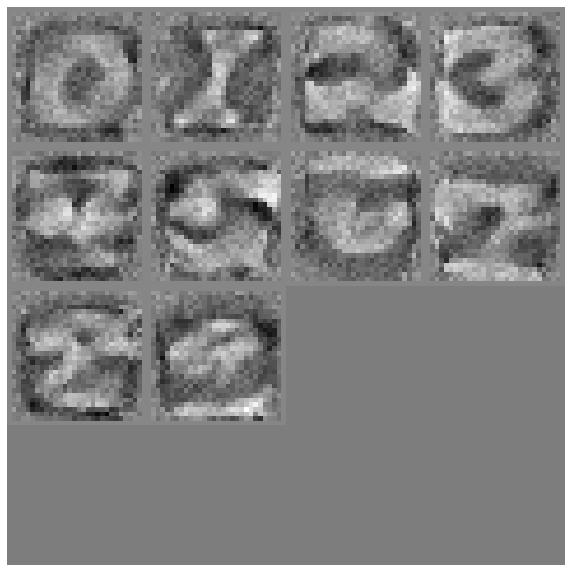

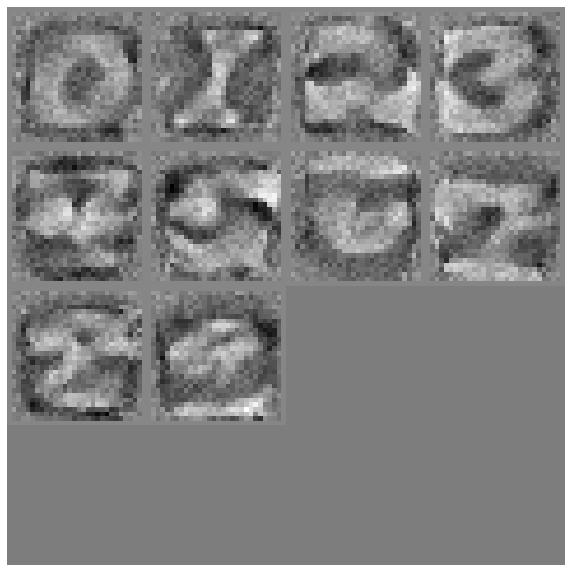

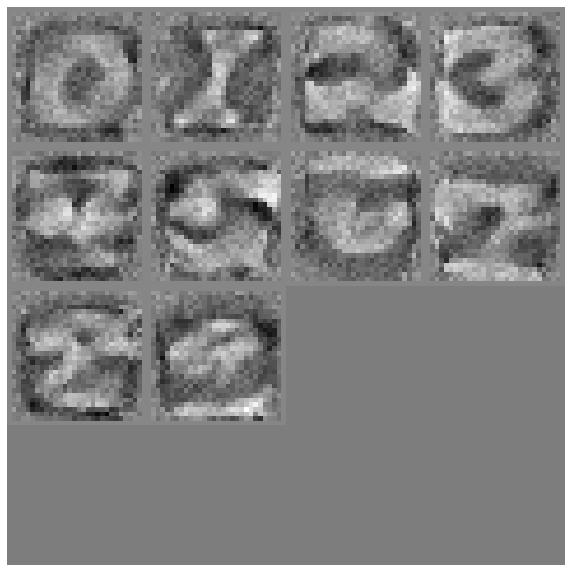

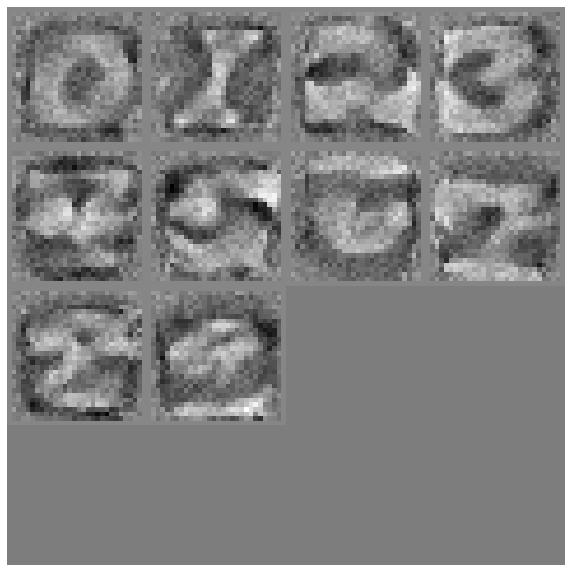

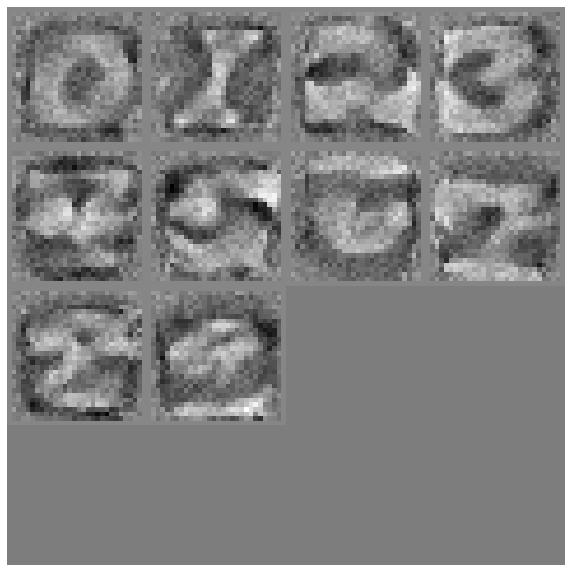

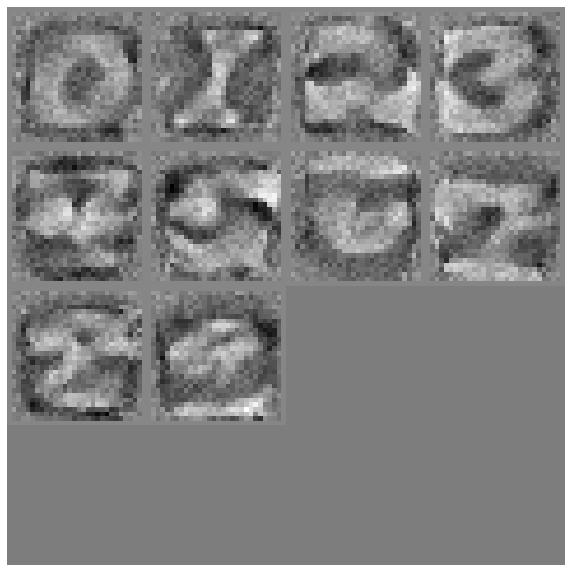

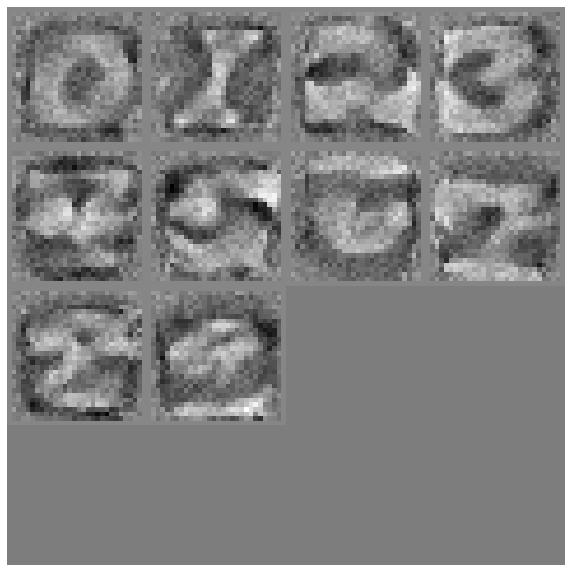

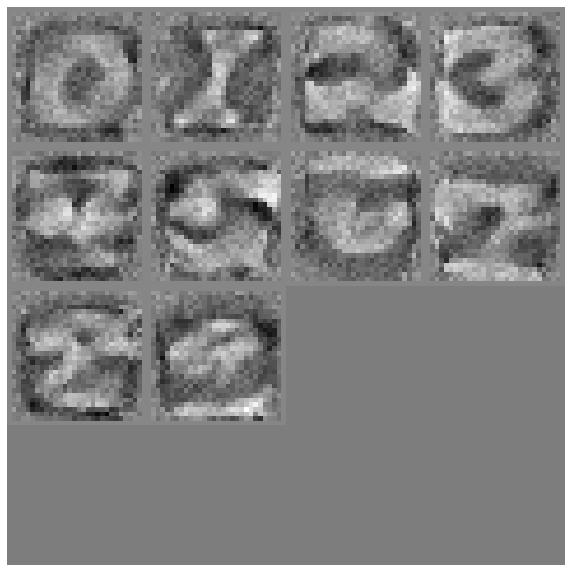

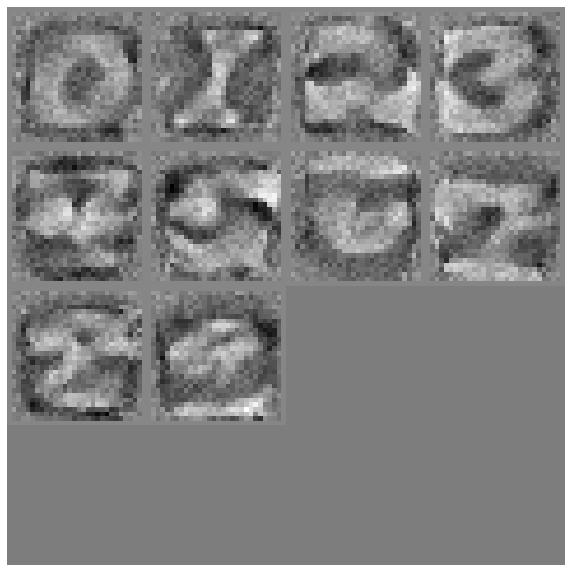

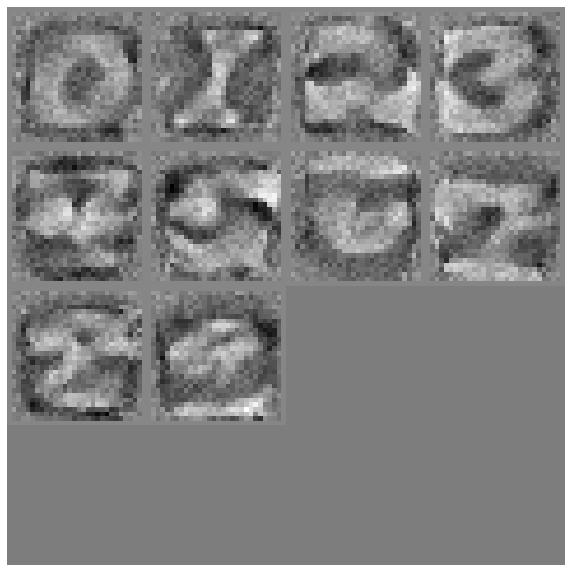

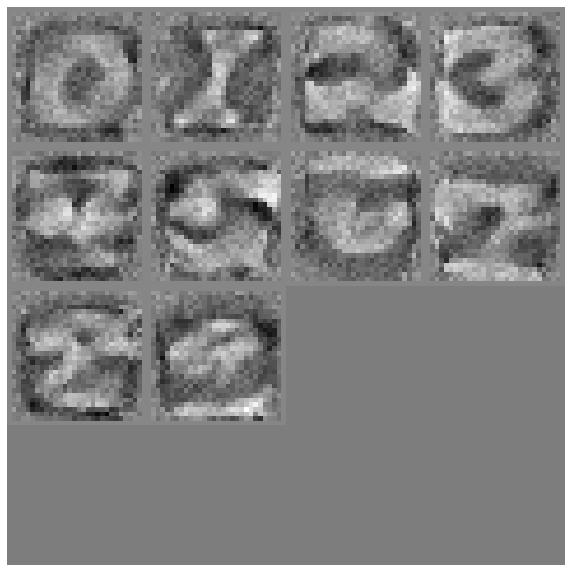

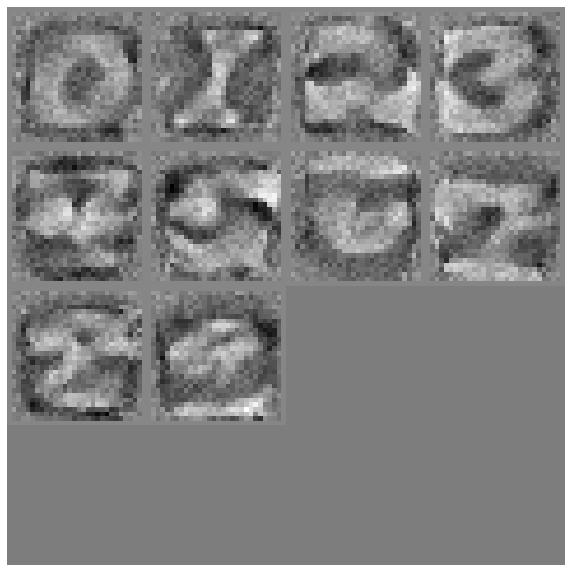

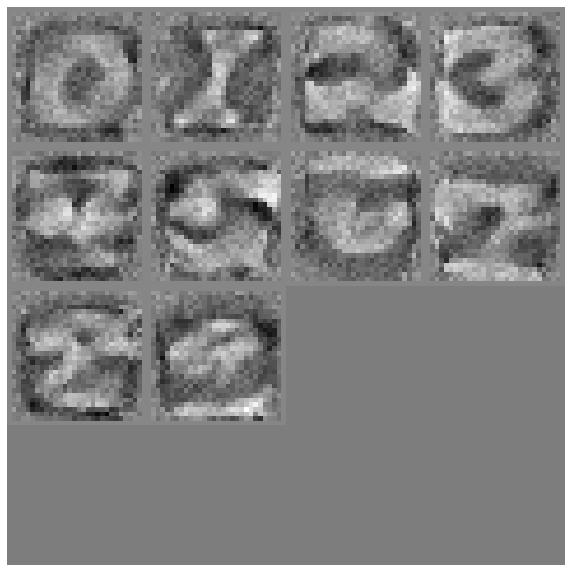

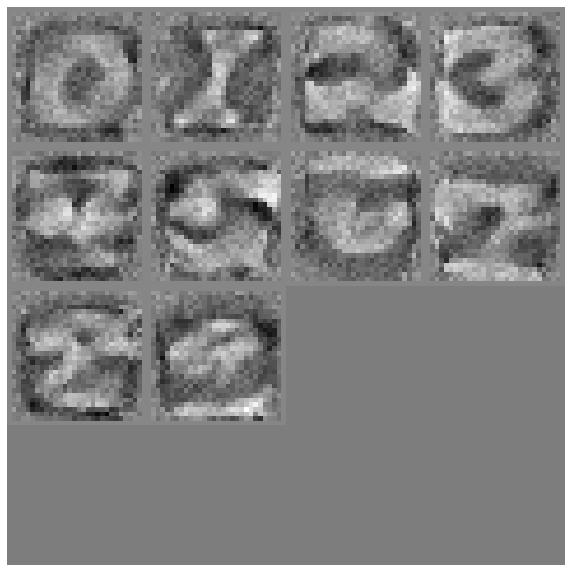

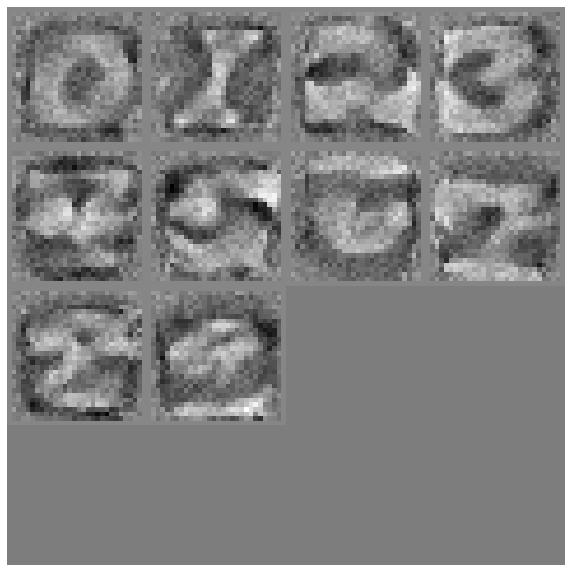

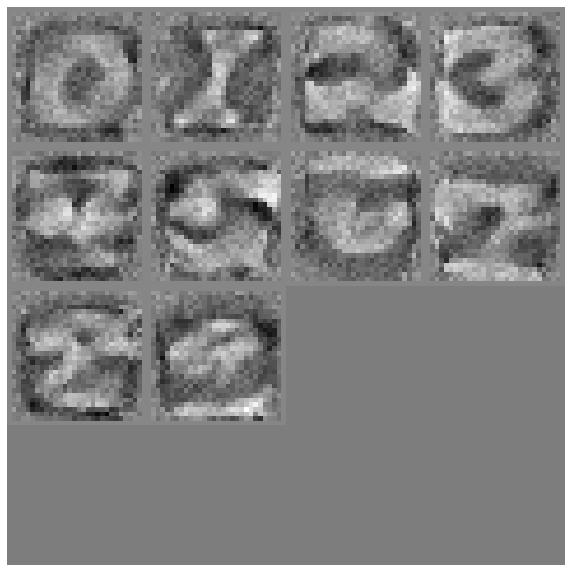

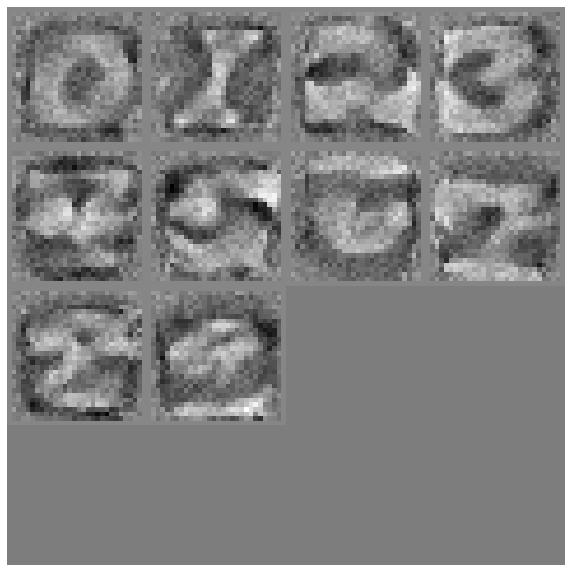

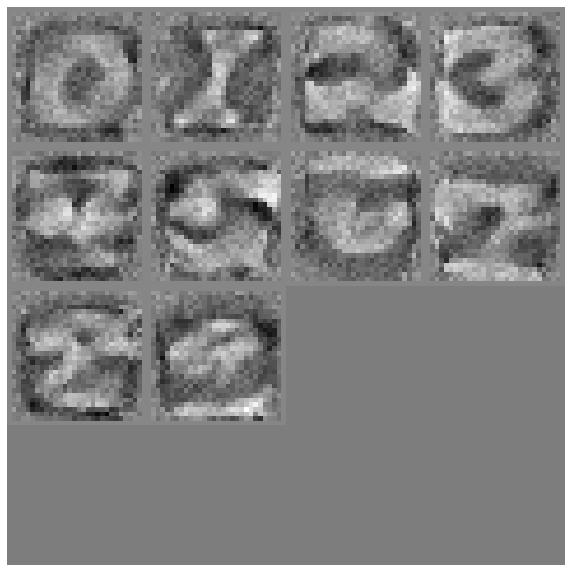

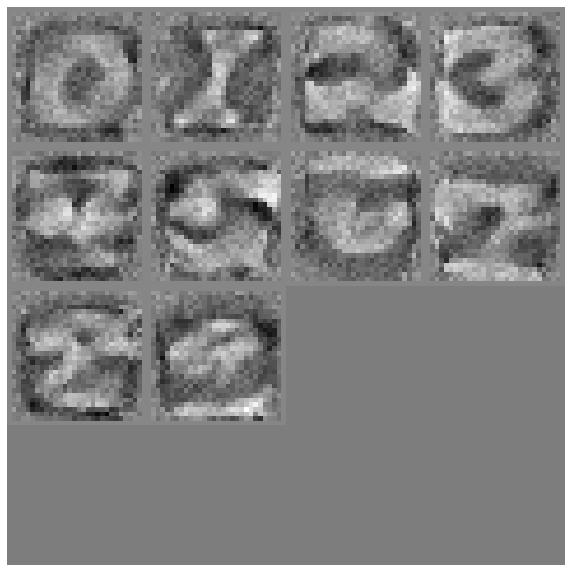

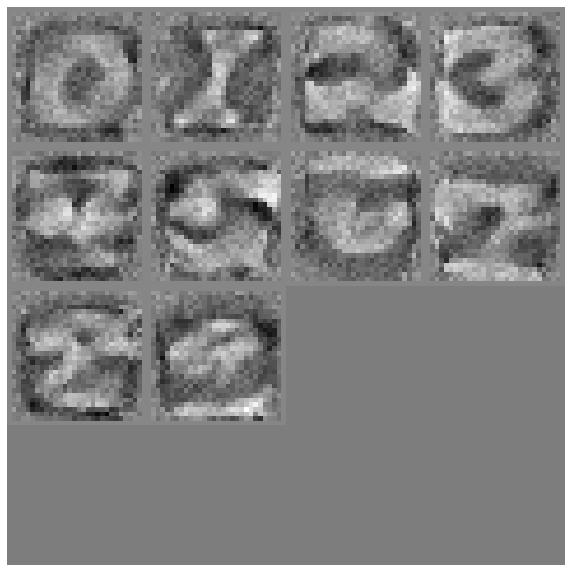

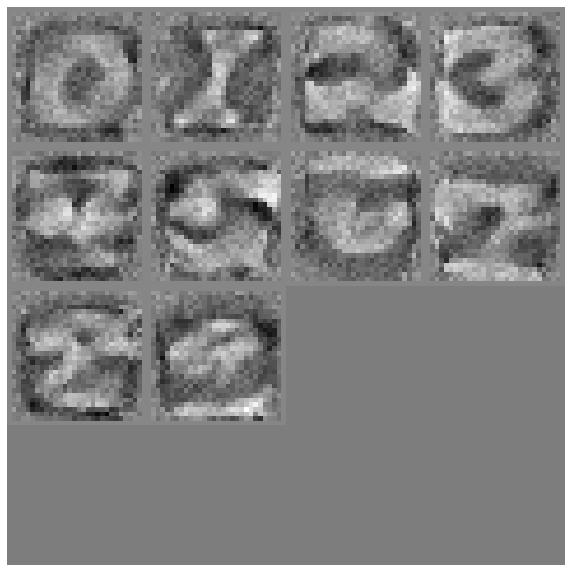

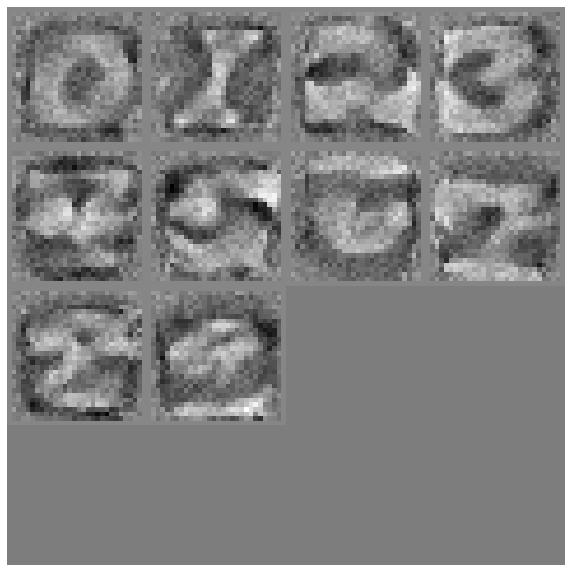

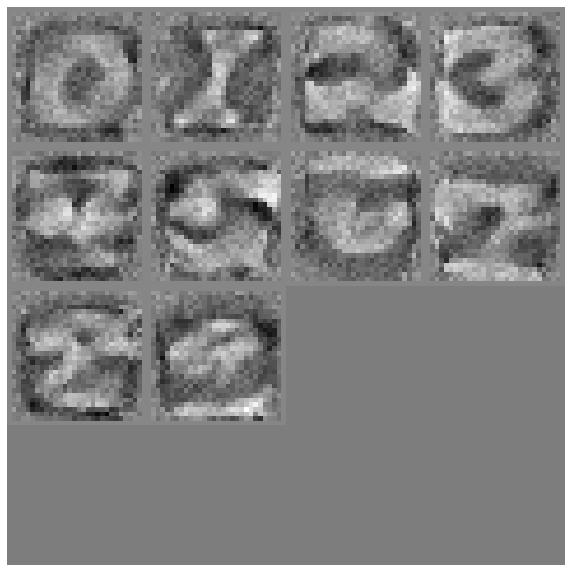

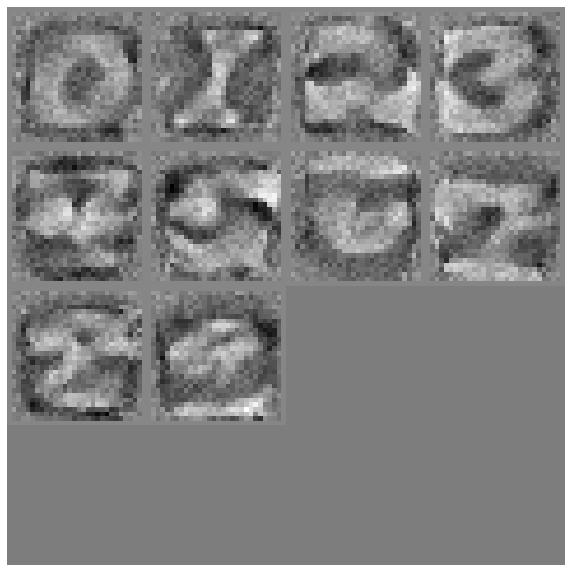

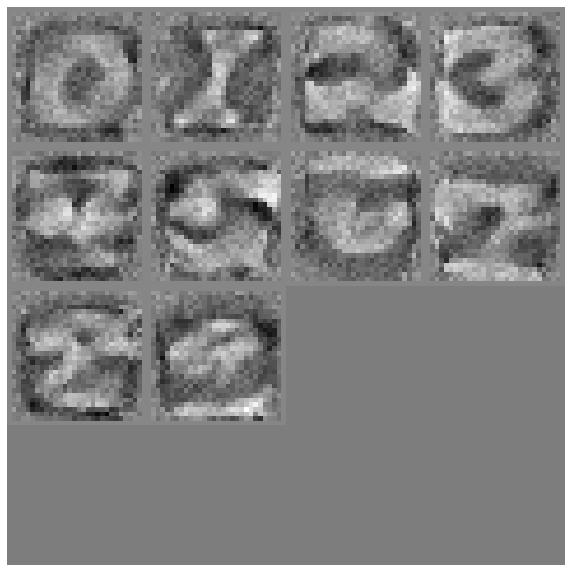

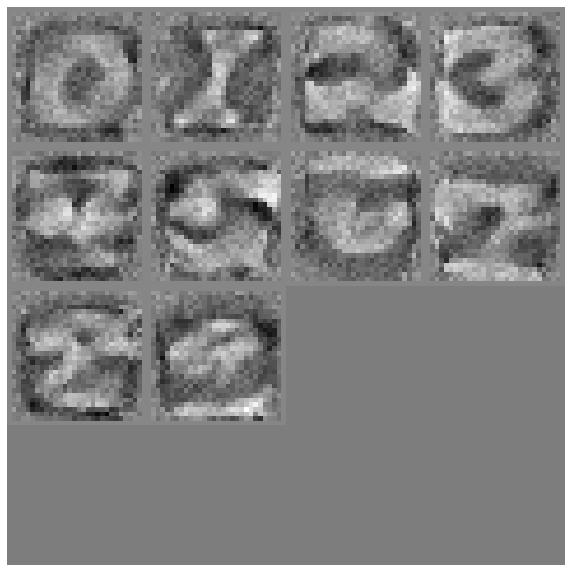

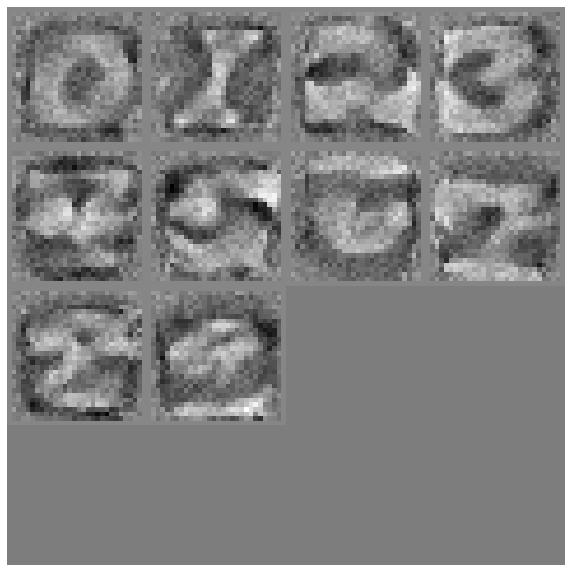

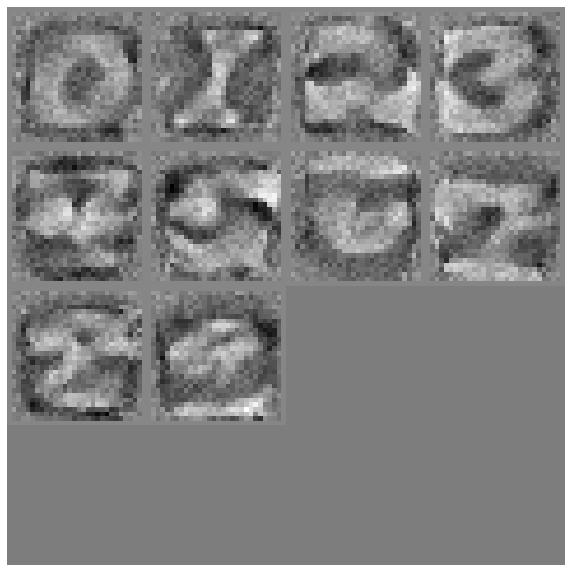

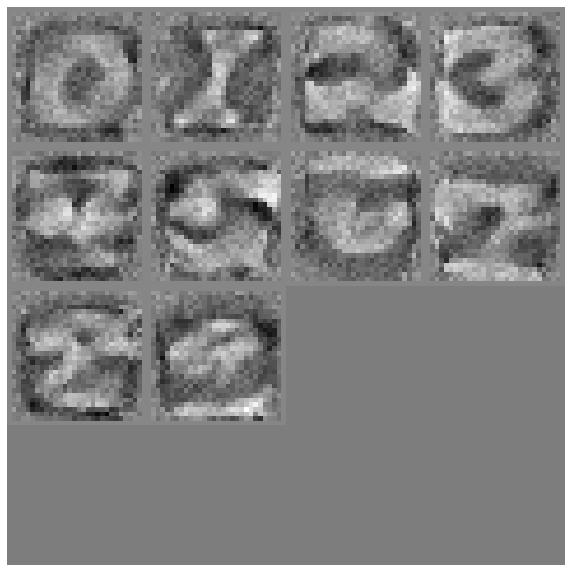

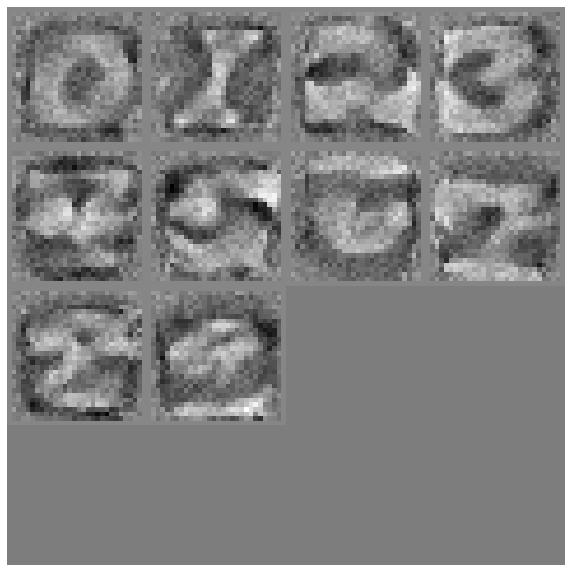

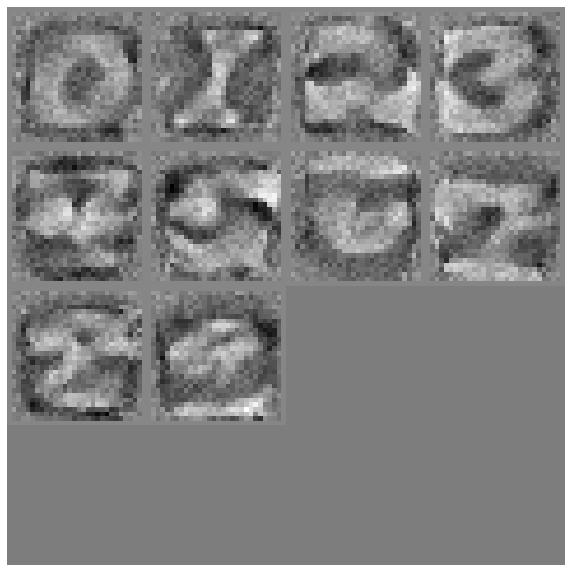

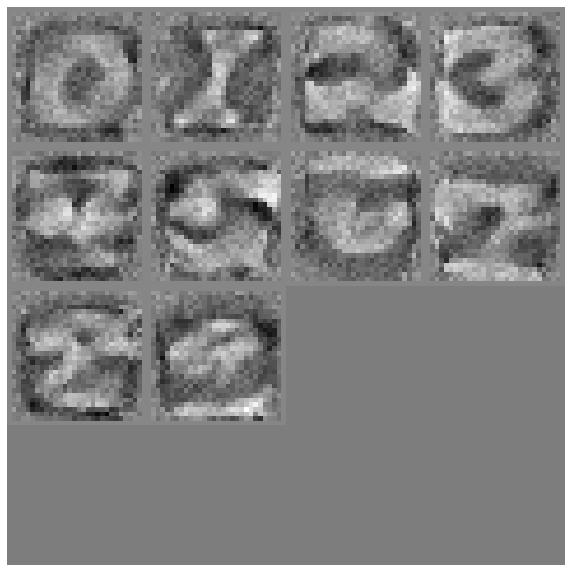

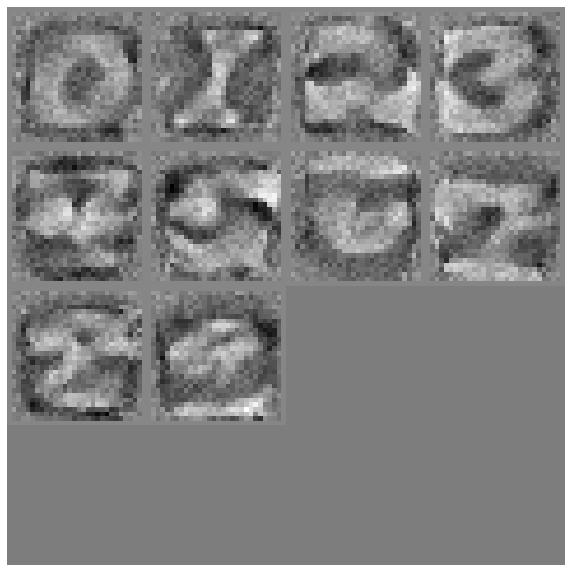

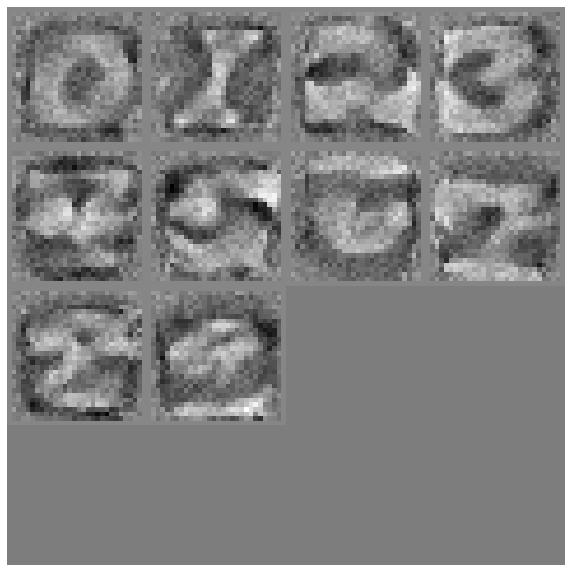

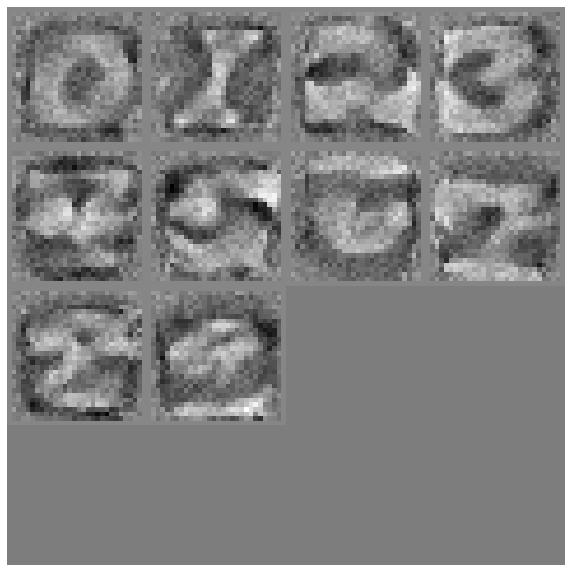

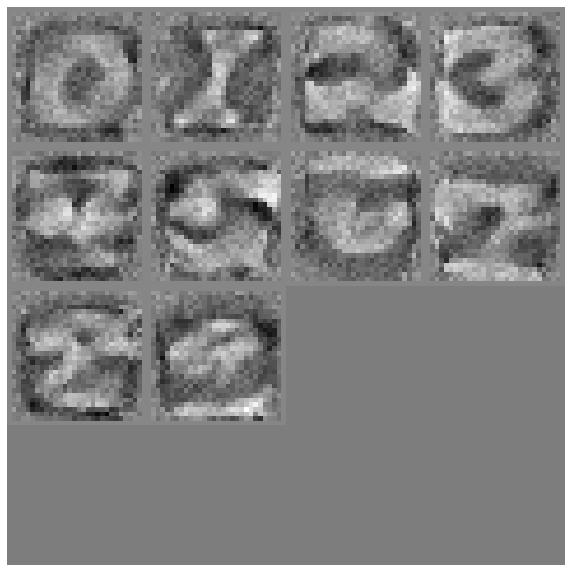

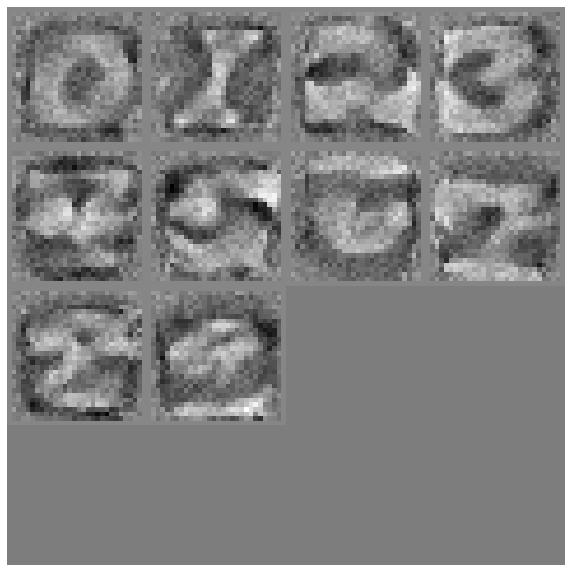

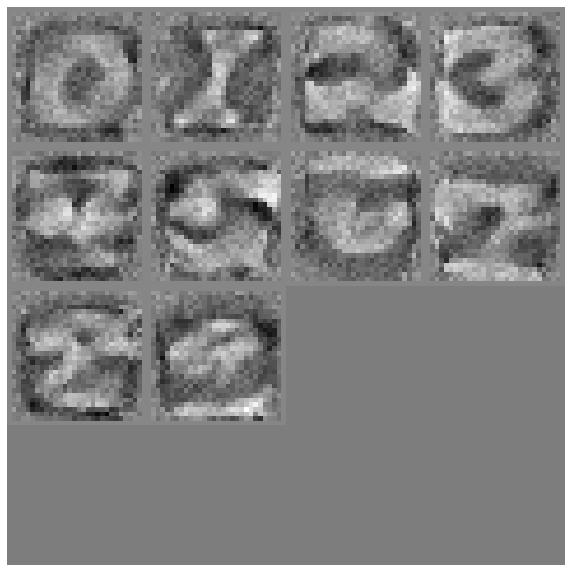

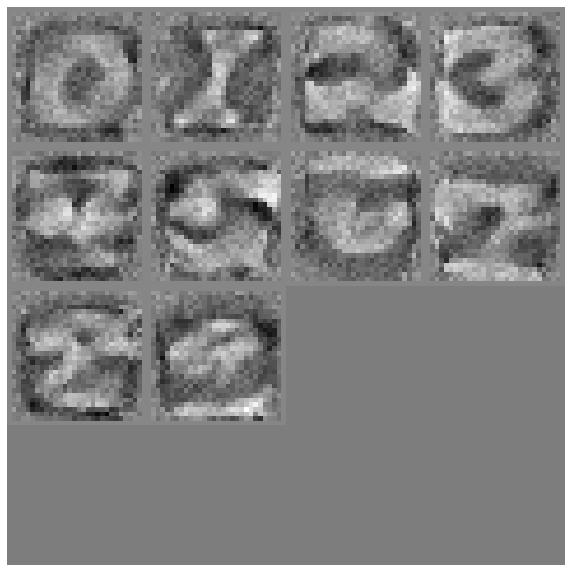

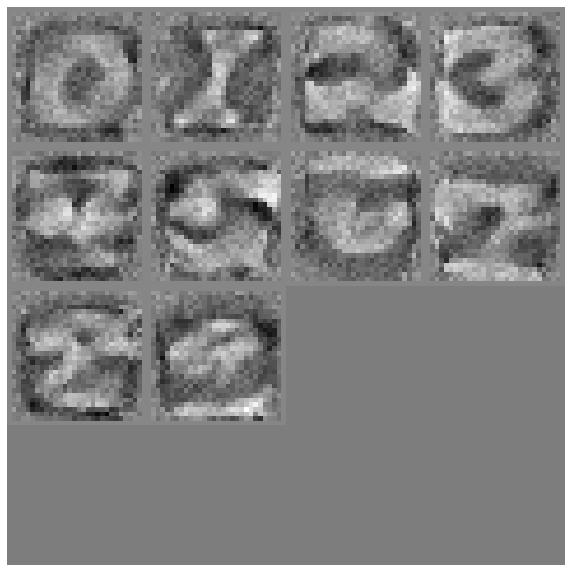

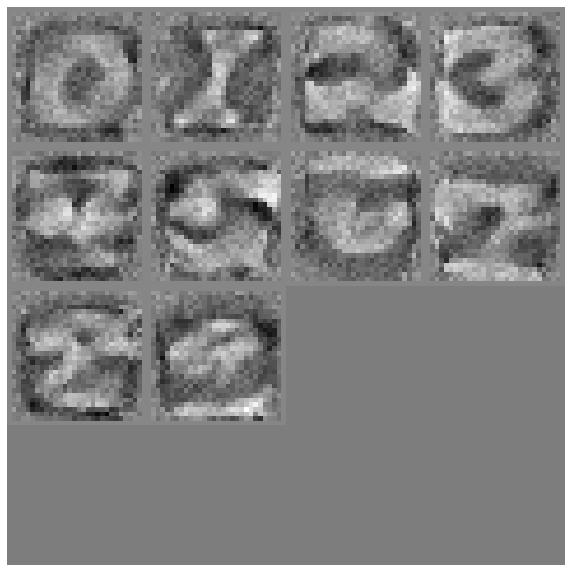

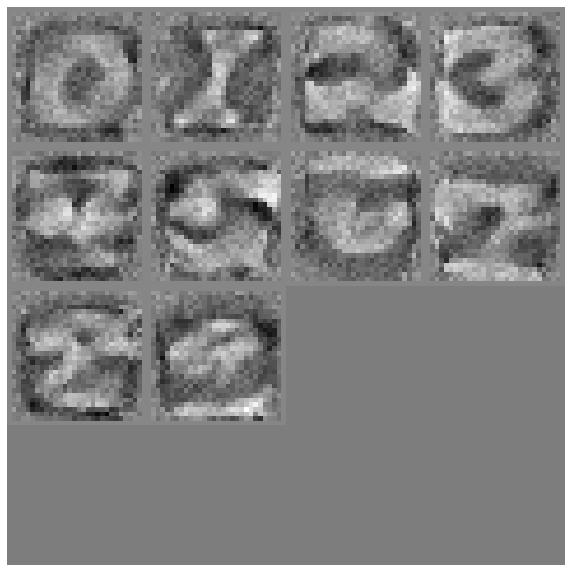

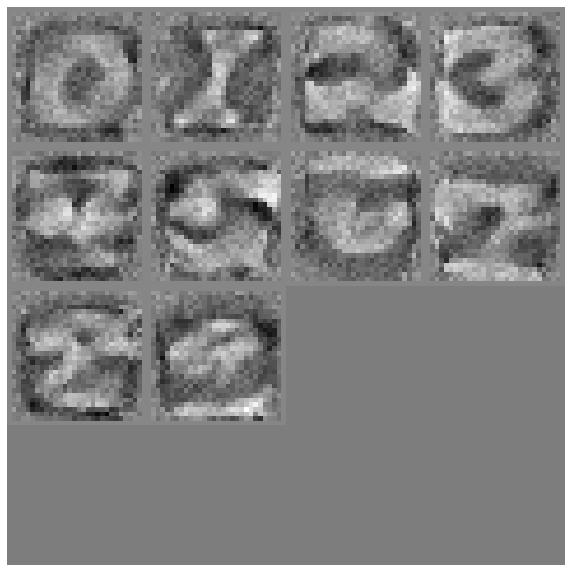

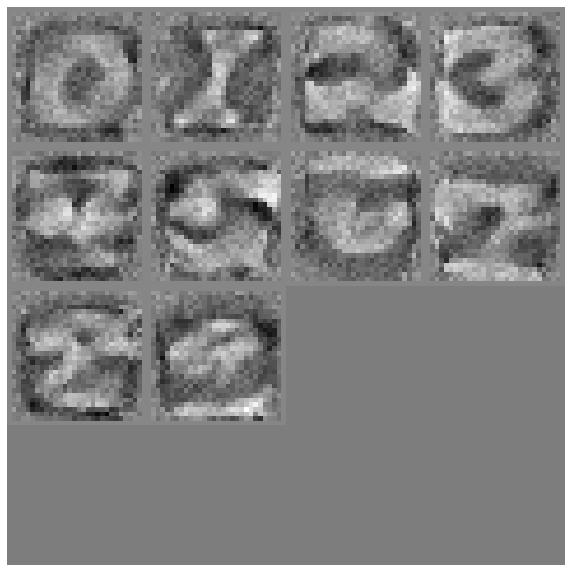

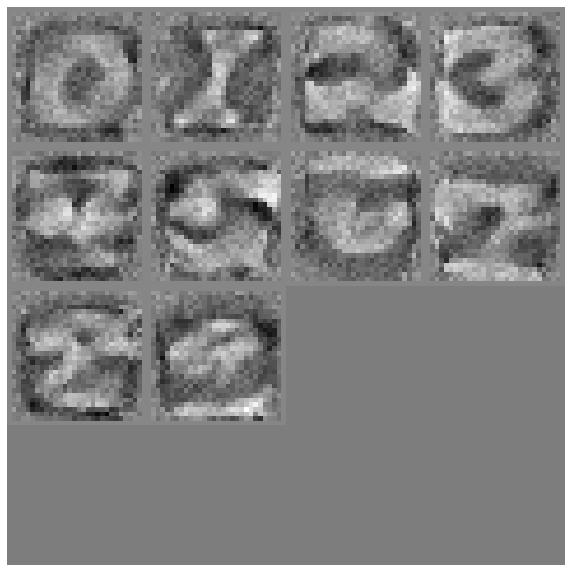

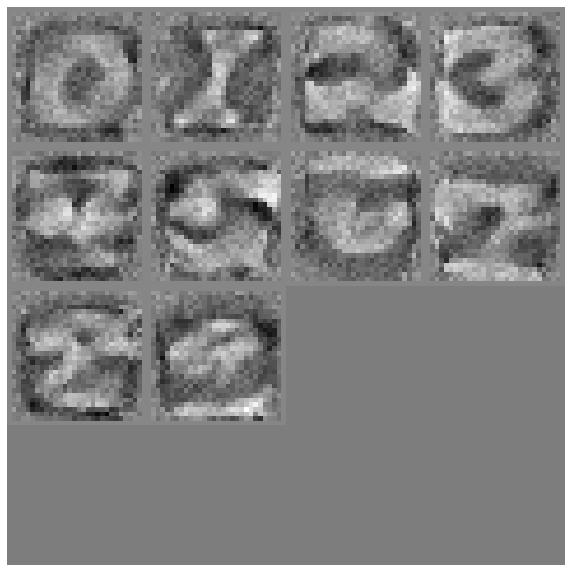

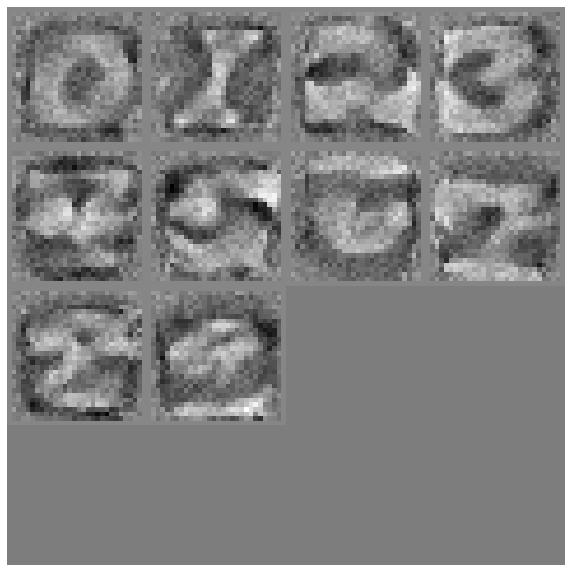

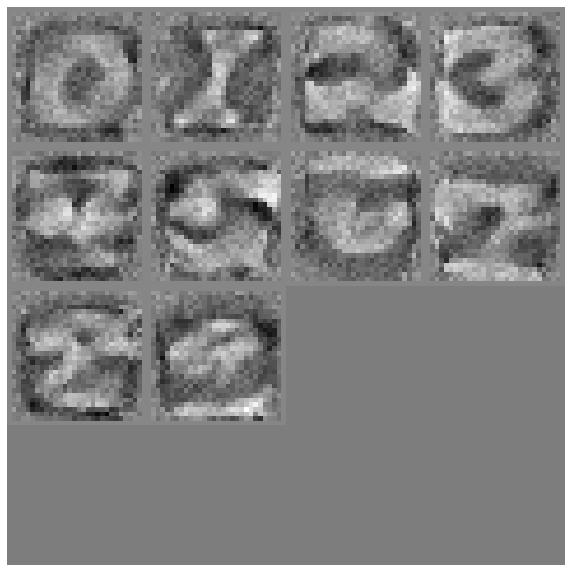

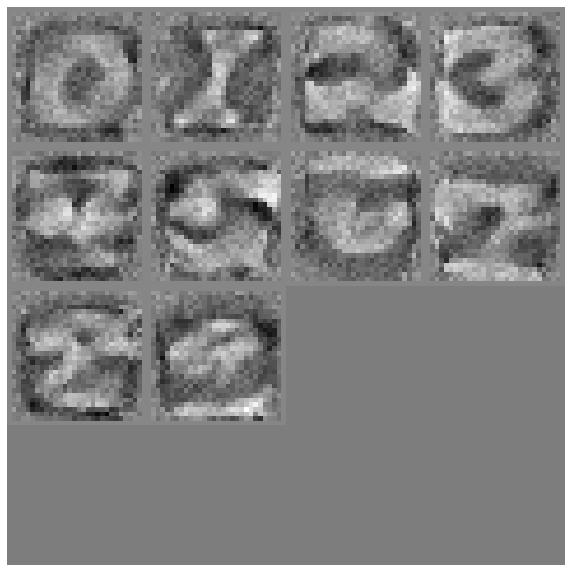

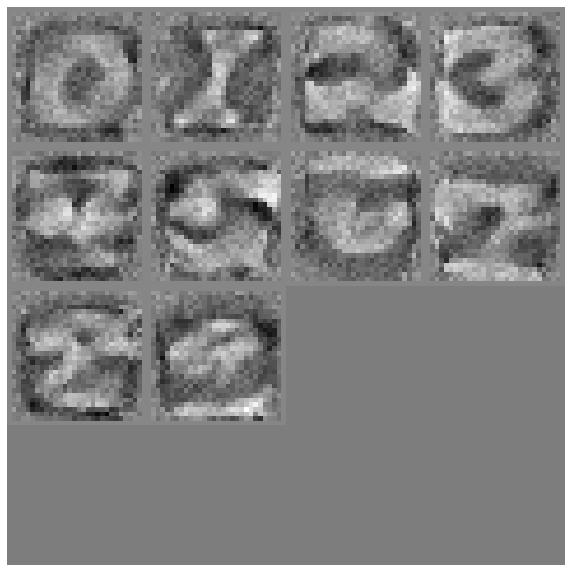

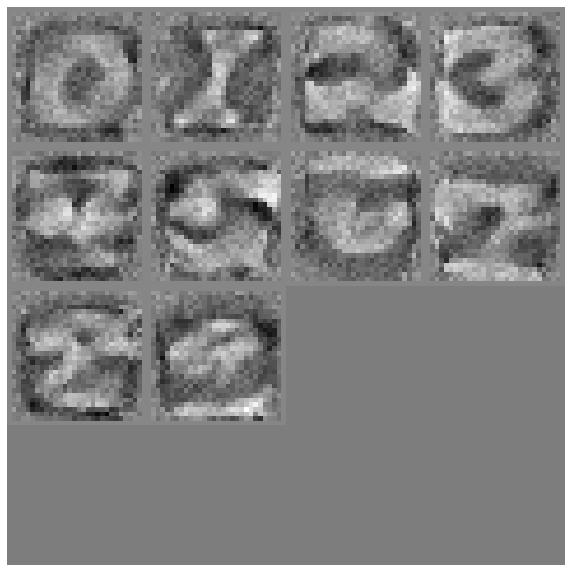

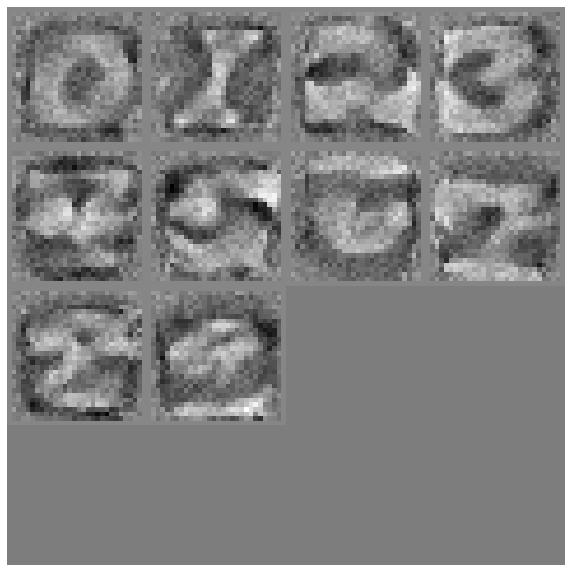

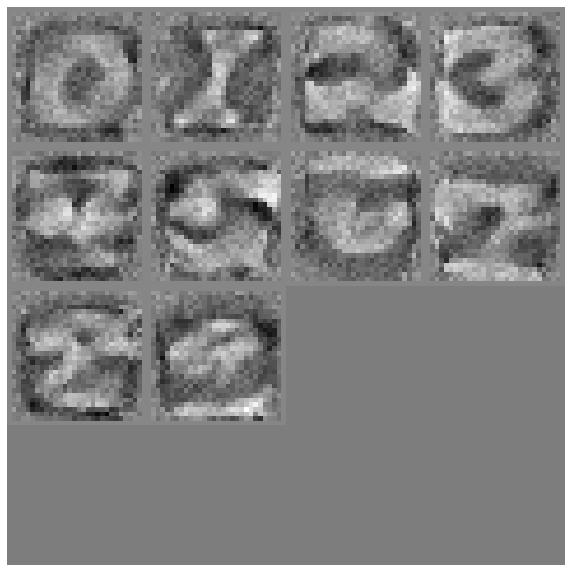

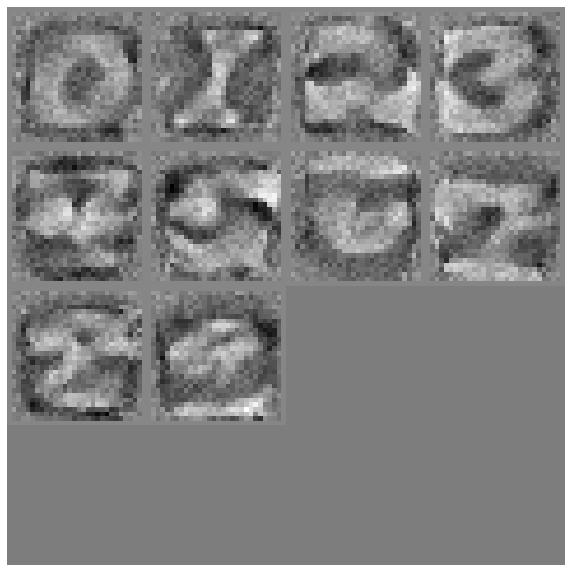

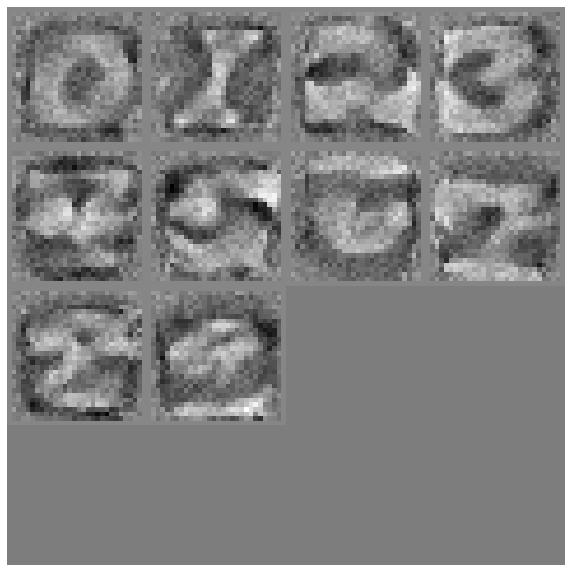

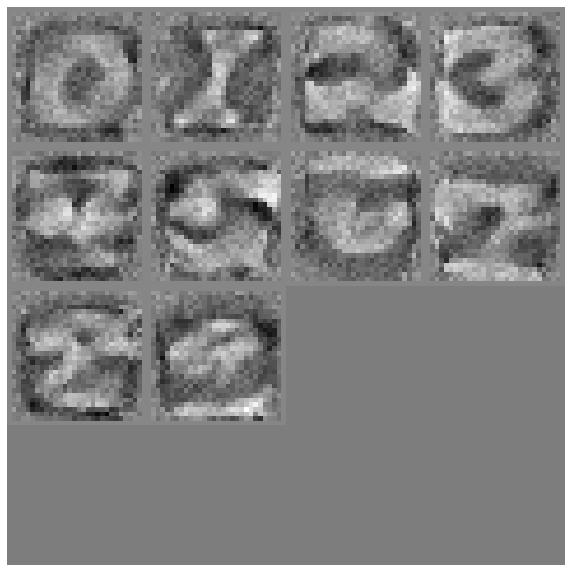

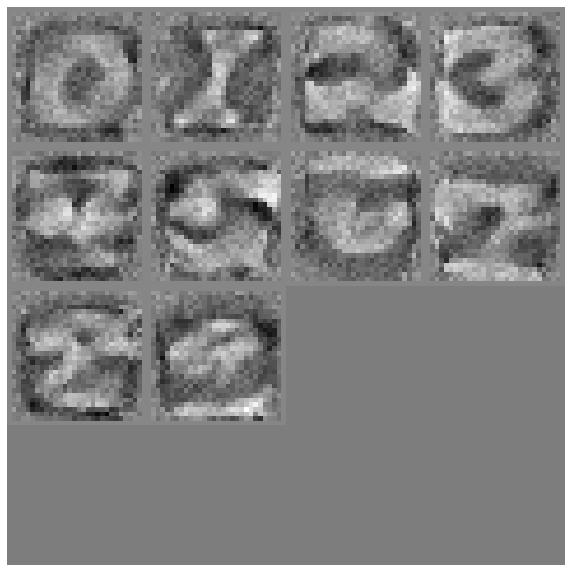

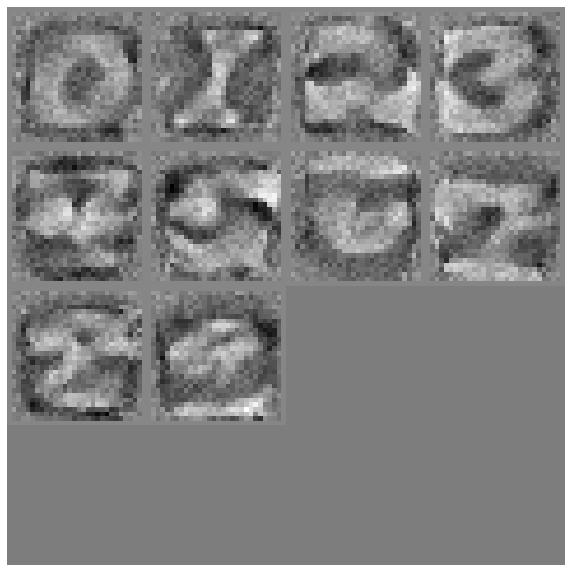

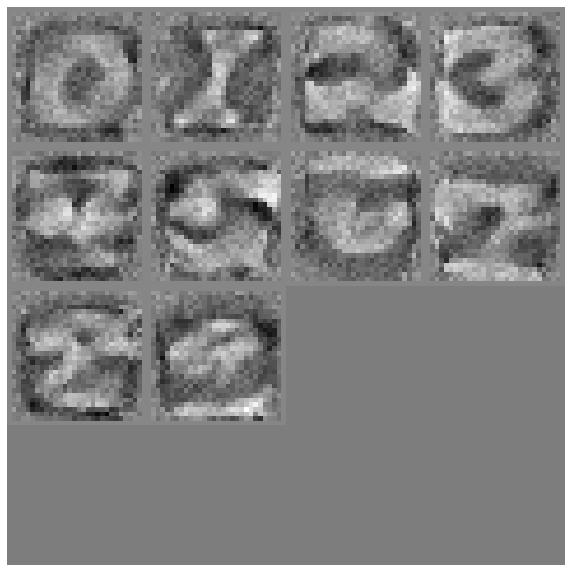

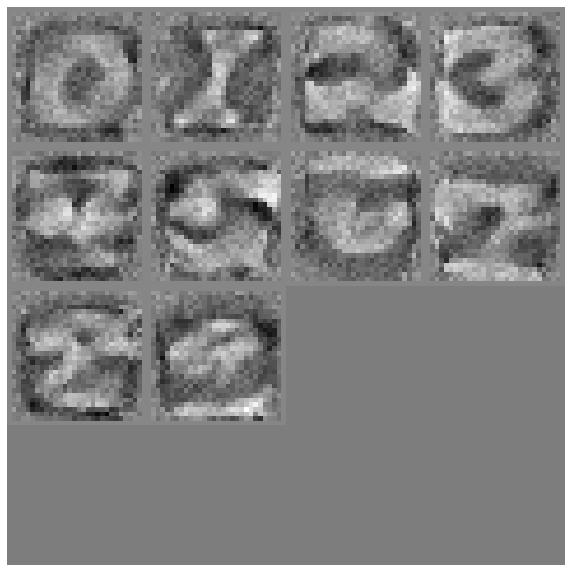

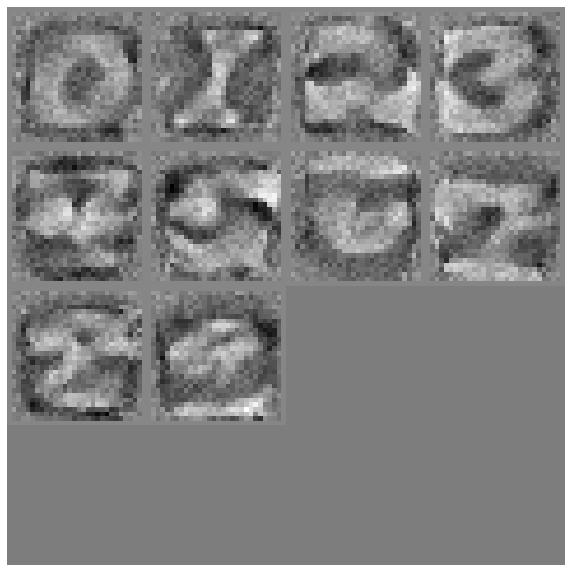

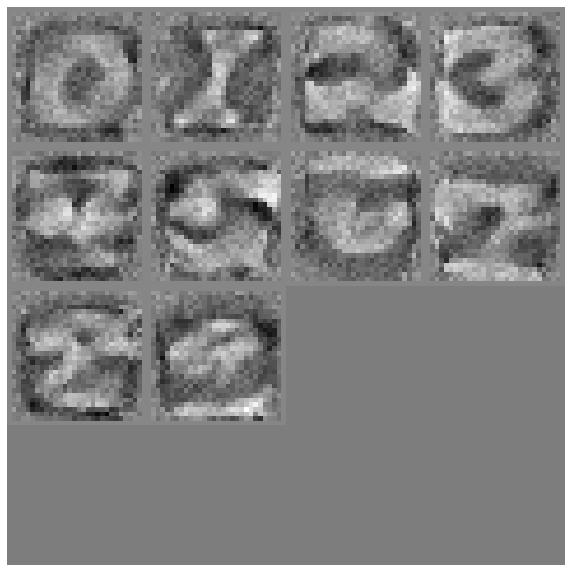

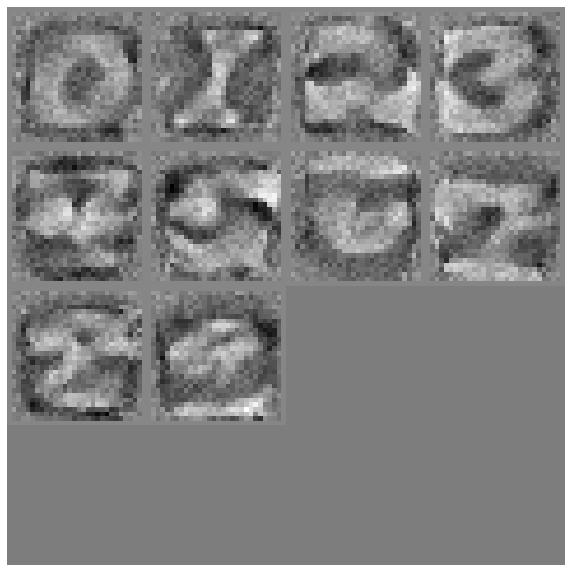

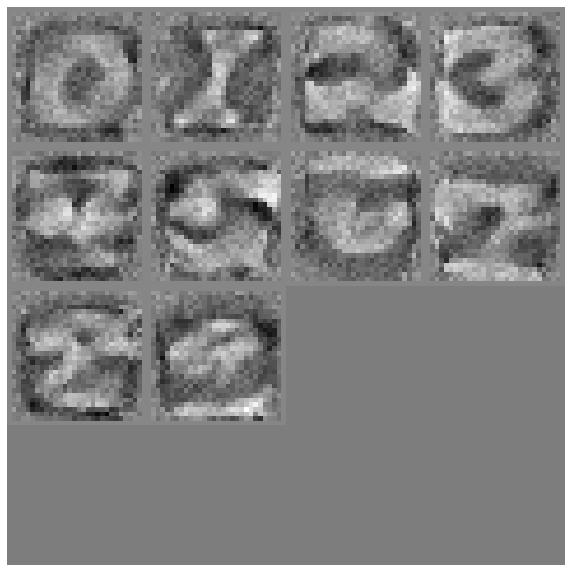

In [213]:
wb.init(project="Simple_Linear_Adam");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

These our the images the data spits out

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing